# Predicting the presence of diabetes in patients through diagnostic measurements

## Phase 1: Data Preparation & Visualisation

### Group Name: Group 67 

### Name and Student ID: Ting Li s3912985

## Table of Contents

- [Introduction](#intro)
  - [Dataset Source](#source)
  - [Dataset Details](#dtl)
  - [Dataset Features](#feat)
  - [Target Feature](#target)  
- [Goals & Objectives](#goals)
- [Data Cleaning & Preprocessing](#pre)
- [Data Exploration & Visualisation](#vis)
- [Literature Review](#lit)
- [Summary & Conclusions](#sum)
- [References](#ref)

## Introduction <a id='intro'></a>

### Dataset Source <a id='source'></a>

The Diabetes dataset used in this study was sourced from Kaggle (UCI Machine Learning, 2017). This dataset contains diagnostic measurements of female patients of Pima Indian Heritage and whether or not they are diagnosed with diabetes within 5 years of the examination.

### Dataset Details <a id='dtl'></a>

This dataset is about the prediction of diabetes in female patients of Pima Indian Heritage, using diagnostic measurements. There are 9 variables and 768 observations in this dataset. The outcome variable is about whether the patient has diabetes and the other 8 variables contain diagnostic measurements including the number of pregnancies, glucose test results, blood pressure, skin thickness, insulin, body mass index(BMI), Diabetes Pedigree Function, age.

#### Dataset Retrieval

The diabetes dataset has been downloaded from Kaggle. We will now load the data and modules to be used in Phase 1 of this study.

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
from scipy.stats import normaltest

pd.set_option('display.max_columns', None)

In [15]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.sample(10, random_state=999)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
441            2       83             66             23       50  32.2   
57             0      100             88             60      110  46.8   
68             1       95             66             13       38  19.6   
95             6      144             72             27      228  33.9   
411            1      112             72             30      176  34.4   
192            7      159             66              0        0  30.4   
352            3       61             82             28        0  34.4   
400            4       95             64              0        0  32.0   
677            0       93             60              0        0  35.3   
376            0       98             82             15       84  25.2   

     DiabetesPedigreeFunction  Age  Outcome  
441                     0.497   22        0  
57                      0.962   31        0  
68                      0.334   25        0  
95                      0.255   40        0  
411                     0.528   25        0  
192                     0.383   36        1  
352                     0.243   46        0  
400                     0.161   31        1  
677                     0.263   25        0  
376                     0.299   22        0

### Dataset Features <a id='feat'></a>

The table below provides descriptions of features in the diabetes dataset, which are taken from Kaggle (UCI Machine Learning, 2017).

In [16]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description of Features'],
         ['Pregnancies','Numeric','NA','Number of times pregnant'],
         ['Glucose','Numeric','NA','Plasma glucose concentration a 2 hours in an oral glucose tolerance test (GTT)'],
         ['BloodPressure','Numeric','mm Hg','Diastolic blood pressure'],
         ['SkinThickness','Numeric','mm','Triceps skin fold thickness'],
         ['Insulin','Numeric','mu U/ml','2-Hour serum insulin'],
         ['BMI','Numeric','NA','Body mass index (weight in kg/(height in m)^2)'],
         ['DiabetesPedigreeFunction','Numeric','NA','Diabetes pedigree function (calculated on diabetes history in relatives and their genetic relationship)'],
         ['Age','Numeric','km','Distance from Central Business District'],
         ['Outcome','Binary','NA','whether a patient has diabetes within 5 years of the examination(class variable, 0 or 1)']]
table_name = "Table 1: Descriptions of Features"
print(table_name)
print(tabulate(table, headers='firstrow', tablefmt='grid'))

Table 1: Descriptions of Features
+--------------------------+-------------+---------+---------------------------------------------------------------------------------------------------------+
| Name                     | Data Type   | Units   | Description of Features                                                                                 |
+==========================+=============+=========+=========================================================================================================+
| Pregnancies              | Numeric     | NA      | Number of times pregnant                                                                                |
+--------------------------+-------------+---------+---------------------------------------------------------------------------------------------------------+
| Glucose                  | Numeric     | NA      | Plasma glucose concentration a 2 hours in an oral glucose tolerance test (GTT)                          |
+-----------

### Target Features <a id='target'></a>

For this project, the target feature in this dataset will be the outcome of patients' diagnosis, that is, prediction of whether or not the patient will develop diabetes in 5 years based on 8 descriptive variables.

## Goals & Objectives <a id='goals'></a>

Diabetes is a major cause of diseases and conditions such as heart attacks, stroke, kidney failure and lower limb amputation (World Health Organization, 2023). Prevalence of diabetes can vary by region or ethnic groups and the population of Pima Indian Heritage (Schulz et al., 2006). A model that can predict diabetes using diagnostic measurement of subjects can be helpful in real-world medical situations. For example, it can be used to assist detection of diabetes from individuals' health check-up data, or to be used to predict other diseases and conditions for early prevention and intervention.  

The main objective of this project is to predict whether diabetes will be onset in a patient in 5 years, based on measurements of 8 risk factors for diabetes in an examination. For Phase 1 of the project, we are going to: (1) perform data cleaning and preprocessing, (2) explore patterns and relationships within the dataset through descriptive statistics and data visualisation, and (3) provide literature review on the use of machine learning methods in the prediction and diagnosis of diseases.

Data selected for this dataset satisfies the following criteria: (1) all subjects are females of Pima Indian Heritage, aged 21 or above during time of the examination; (2) for each subject only one examination was selected and the chosen examination gave a non-diabetic glucose tolerance test measurement, that is below 200; (3) subjects that are diagnosed with diabetes within 1 year of examination are excluded from the dataset to remove easy-to-detect data (Smith, Everhart, Dickson, Knowler, & Johannes, 1988).





## Data Cleaning & Preprocessing <a id='pre'></a>

This section includes the data cleaning and preprocessing steps undertaken to prepare the data for predictive modeling in Phase 2 of this project. These steps are listed below and will be performed in order as specified in the course website (www.featureranking.com).

Data Cleaning Steps

- Dataset observation
 - Check and drop irrelevant features in our dataset
 - Check and rename/ modify some column names if needed
- Outliers, unusual values and missing values
 - Check for outliers and unusual values
 - Impute or drop all rows with outliers and unusual values
 - Check for missing values
 - Impute or drop all rows with missing values
- Check if the target feature is label-encoded




One-hot-encoding (OHE) should be performed for categorical descriptive feature to encode them to be numeric, therefore is not a part of the project in Phase 1 & 2 as there is no categorical data in this dataset. Scaling of numeric features is not included in Phase 1 as specified in Phase 1 criteria.

### Dataset Observation

Column names of the diabetes dataset are displayed below.

In [17]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Upon inspection of features, no redundancy was found. However, column `BloodPressure`, `SkinThickness`, and `DiabetesPedigreeFunction` are not named properly, and should be renamed with underscores for readability. After renaming, we observe from the sample that changes have been made and all column names are consistent.

In [18]:
#mapping new column names 

columns_new = {
    'BloodPressure': 'Blood_Pressure',
    'SkinThickness': 'Skin_Thickness',
    'DiabetesPedigreeFunction': 'Diabetes_Pedigree_Function'}

# rename columns
diabetes = diabetes.rename(columns = columns_new)
diabetes.sample(5, random_state=999)


Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  \
441            2       83              66              23       50  32.2   
57             0      100              88              60      110  46.8   
68             1       95              66              13       38  19.6   
95             6      144              72              27      228  33.9   
411            1      112              72              30      176  34.4   

     Diabetes_Pedigree_Function  Age  Outcome  
441                       0.497   22        0  
57                        0.962   31        0  
68                        0.334   25        0  
95                        0.255   40        0  
411                       0.528   25        0

Then we continue to check the dataset for its shape and data types to make sure they are suitable and match the description.

In [19]:
print(f"Shape of the dataset = {diabetes.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(diabetes.dtypes)

Shape of the dataset = (768, 9) 

Data types are below where 'object' indicates a string type: 
Pregnancies                     int64
Glucose                         int64
Blood_Pressure                  int64
Skin_Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes_Pedigree_Function    float64
Age                             int64
Outcome                         int64
dtype: object


We observe that the shape of the dataset matches the description and data types are suitable. Since all variables are numeric, we now move on to generating summary statistics for all variables.

### Outliers, Unusual Values and Missing Values

Table 2 shows a summary of numerical features all features in the diabetes dataset. From the summary table we found unusual values in variables below:

- Glucose
- Blood_Pressure
- Skin_Thickness
- Insulin
- BMI 

As subjects of the diabetes dataset are living human beings, all above variables can not take 0 as a value. We observed below that there are no missing values in the diabetes dataset. It is likely that 0 was used during data entry to represent missing values.

In [20]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
diabetes.describe(include=['int64','float64']).T

count        mean         std     min       25%  \
Pregnancies                 768.0    3.845052    3.369578   0.000   1.00000   
Glucose                     768.0  120.894531   31.972618   0.000  99.00000   
Blood_Pressure              768.0   69.105469   19.355807   0.000  62.00000   
Skin_Thickness              768.0   20.536458   15.952218   0.000   0.00000   
Insulin                     768.0   79.799479  115.244002   0.000   0.00000   
BMI                         768.0   31.992578    7.884160   0.000  27.30000   
Diabetes_Pedigree_Function  768.0    0.471876    0.331329   0.078   0.24375   
Age                         768.0   33.240885   11.760232  21.000  24.00000   
Outcome                     768.0    0.348958    0.476951   0.000   0.00000   

                                 50%        75%     max  
Pregnancies                   3.0000    6.00000   17.00  
Glucose                     117.0000  140.25000  199.00  
Blood_Pressure               72.0000   80.00000  122.00  
Skin_Thickness               23.0000   32.00000   99.00  
Insulin                      30.5000  127.25000  846.00  
BMI                          32.0000   36.60000   67.10  
Diabetes_Pedigree_Function    0.3725    0.62625    2.42  
Age                          29.0000   41.00000   81.00  
Outcome                       0.0000    1.00000    1.00

In [21]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
print(diabetes.isnull().sum())


Number of missing values for each column/ feature:
Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64


To determine the method used to deal with missing values in the dataset, we checked the count of zeros in column `Glucose`, `Blood_Pressure`, `Skin_Thickness`, `Insulin`, and `BMI`. As shown above, the count of missing values in those columns range from 5 to 374. As the dataset only has 768 observations, dropping all columns with missing values will result in a loss of valuable information. Therefore, missing values should be imputed for this project.


In [22]:
# Create subset for inspection of 5 columns with zeros
subset_cols_with_0 = diabetes.iloc[:,1:6]
count_0 = subset_cols_with_0.eq(0).sum()
count_0

Glucose             5
Blood_Pressure     35
Skin_Thickness    227
Insulin           374
BMI                11
dtype: int64

Numeric values can be imputed with the mean or median (Taheri, 2021). The median is often used for imputation when data is skewed and the mean is used when data is normally distrubuted, as the mean is more sensitive to outliers than the median. We will inspect the distribution of `Glucose`, `Blood_Pressure`, `Skin_Thickness`, `Insulin`, and `BMI` to decide which imputation to use. 

Text(0.5, 0.98, 'Figure 1: Histogram of Glucose, Blood_Pressure, Skin_Thickness, Insulin, and BMI')

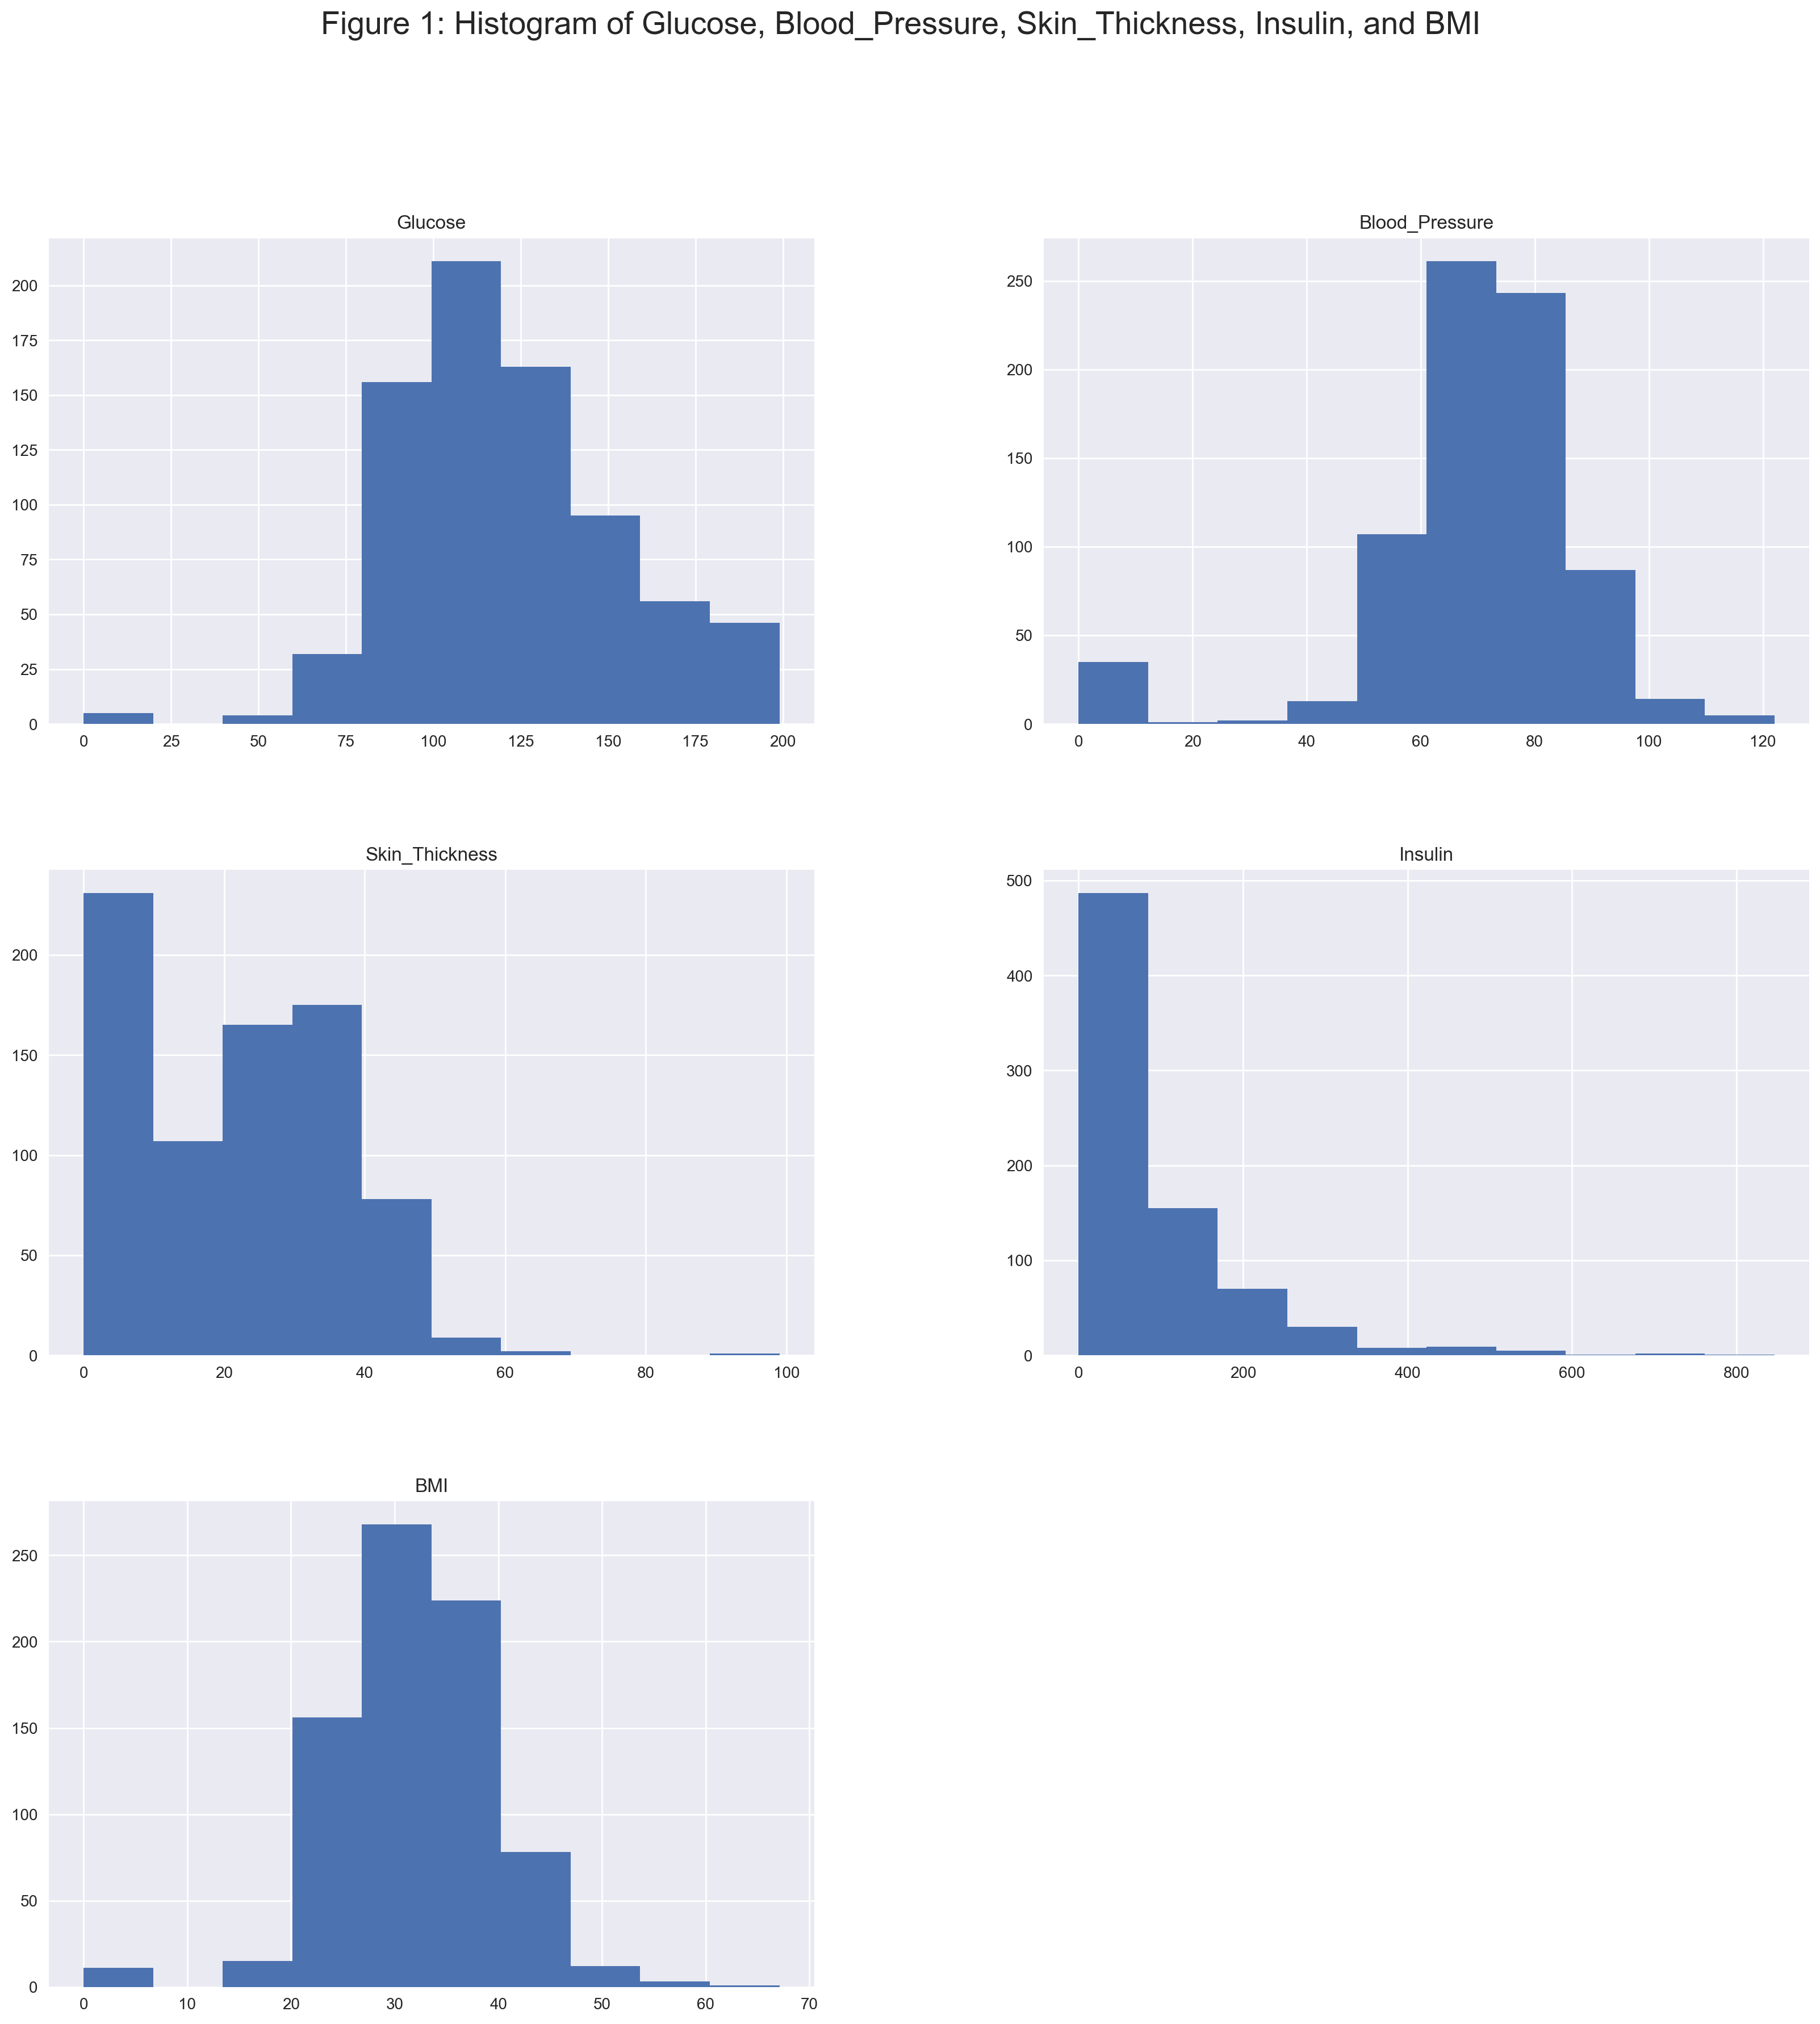

In [23]:
p1 = subset_cols_with_0.hist(figsize = (20,20))
plt.suptitle('Figure 1: Histogram of Glucose, Blood_Pressure, Skin_Thickness, Insulin, and BMI', fontsize=20)


Histogram (Figure 1) above showed skewness in all 5 variables. For certainty, we will perform normality test below. 

In [24]:
# Normality test
norm = subset_cols_with_0.apply(lambda x: normaltest(x))
print(norm)

     Glucose  Blood_Pressure  Skin_Thickness       Insulin           BMI
0  12.385057    3.058869e+02       17.344871  3.875778e+02  8.614248e+01
1   0.002045    3.780127e-67        0.000171  6.895343e-85  1.969687e-19


The second row of normality test result shows p-value for each variable. As all 5 p-values are smaller than the default significance level (alpha = 0.05), we reject the null hypothesis and conclude that data is not normally distributed for all 5 columns.

Therefore, all missing values will be imputed with the median for the diabetes dataset.

In [25]:
# Impute with median
diabetes.loc[diabetes['Glucose'] == 0, 'Glucose'] = diabetes['Glucose'].median()
diabetes.loc[diabetes['Blood_Pressure'] == 0, 'Blood_Pressure'] = diabetes['Blood_Pressure'].median()
diabetes.loc[diabetes['Skin_Thickness'] == 0, 'Skin_Thickness'] = diabetes['Skin_Thickness'].median()
diabetes.loc[diabetes['Insulin'] == 0, 'Insulin'] = diabetes['Insulin'].median()
diabetes.loc[diabetes['BMI'] == 0, 'BMI'] = diabetes['BMI'].median()

# Check data after imputation
display(HTML('<b>Table 3: Summary of numerical features after imputation</b>'))
diabetes.describe(include=['int64','float64']).T

count        mean         std     min       25%  \
Pregnancies                 768.0    3.845052    3.369578   0.000   1.00000   
Glucose                     768.0  121.656250   30.438286  44.000  99.75000   
Blood_Pressure              768.0   72.386719   12.096642  24.000  64.00000   
Skin_Thickness              768.0   27.334635    9.229014   7.000  23.00000   
Insulin                     768.0   94.652344  105.547598  14.000  30.50000   
BMI                         768.0   32.450911    6.875366  18.200  27.50000   
Diabetes_Pedigree_Function  768.0    0.471876    0.331329   0.078   0.24375   
Age                         768.0   33.240885   11.760232  21.000  24.00000   
Outcome                     768.0    0.348958    0.476951   0.000   0.00000   

                                 50%        75%     max  
Pregnancies                   3.0000    6.00000   17.00  
Glucose                     117.0000  140.25000  199.00  
Blood_Pressure               72.0000   80.00000  122.00  
Skin_Thickness               23.0000   32.00000   99.00  
Insulin                      31.2500  127.25000  846.00  
BMI                          32.0000   36.60000   67.10  
Diabetes_Pedigree_Function    0.3725    0.62625    2.42  
Age                          29.0000   41.00000   81.00  
Outcome                       0.0000    1.00000    1.00

Table 3 indicates that imputation has been performed successfully, and no unusual value was found for all variables except `Pregnancies`. We should notice that the maximum number of pregnancies is 17, and inspect the age of the that subject. 

Also, for the context of this dataset, it is worth noticing that the maximum value for `Glucose` is 199, which fits the criteria that glucose test measurement for all subjects should be non-diabetic, which is below 200. 

In [26]:
# Find the age of the subject who has been pregnant 17 times
value_age = diabetes.loc[diabetes['Pregnancies'] == 17, 'Age'].values[0]
print(f"The subject who has been pregnant 17 times is {value_age} years old.\n")
# Check if there is pregnancy at an unusual age
subset_unusual_age_pregnancy = diabetes[(diabetes['Pregnancies'] - diabetes['Age']).abs() < 15][['Pregnancies', 'Age']]
subset_unusual_age_pregnancy

The subject who has been pregnant 17 times is 47 years old.



Pregnancies  Age
731            8   22

As seen above, it is not abnormal that a 47 years old female can be pregnant 17 times. We also checked if there is anyone pregnant at an unusual age, for example, a 21 years old subject with 15 times pregnancy is likely to be a data entry error. Upon inspection of the dataset, where the difference of subjects' age and times of pregnancies is smaller than 15, we found patient 731 with 8 pregnancies at age 22. As it is possible for a female to be fertile at 14 years old, we conclude that there is no unusual values in the dataset.

### Check Target Feature

In [27]:
# Count each unique value within the target feature
outcome_counts = diabetes['Outcome'].value_counts()
# Calculate the percentage of each unique value within the target feature
outcome_percentage = outcome_counts/outcome_counts.sum()*100
outcome_percentage
print(outcome_counts)
print(outcome_percentage)

0    500
1    268
Name: Outcome, dtype: int64
0    65.104167
1    34.895833
Name: Outcome, dtype: float64


As specified in Table 1, the target feature `Outcome` has been label-encoded to 0 and 1. Out of all 768 patients, 268 was diagnosed with diabetes within 5 years of the examination chosen for the dataset, which is 34.9% of all patients. Diabetes was not onset for the rest of the dataset, which is 500 patients and 65.1% of all patients.


In [29]:
diabetes.to_csv("diabetesP1.csv", index=False)

## Data Exploration & Visualisation <a id='vis'></a>

After all data cleaning steps, we believe that the diabetes dataset is ready to be used for visualisation and exploration.

### Univariate Visualisation

First we inspect the distribution of all variables in the dataset from the histogram below. The shape of distribution fits descriptive statistics in Table 3. We also notice in `Skin_Thickness` and `Insulin` where the missing data was imputed with the median in previous data cleaning steps, shown on the lower end of the distribution. We now move on to inspect variable `BMI` and `Insulin` in more detail.

Text(0.5, 0.98, 'Figure 2: Histogram of all variables')

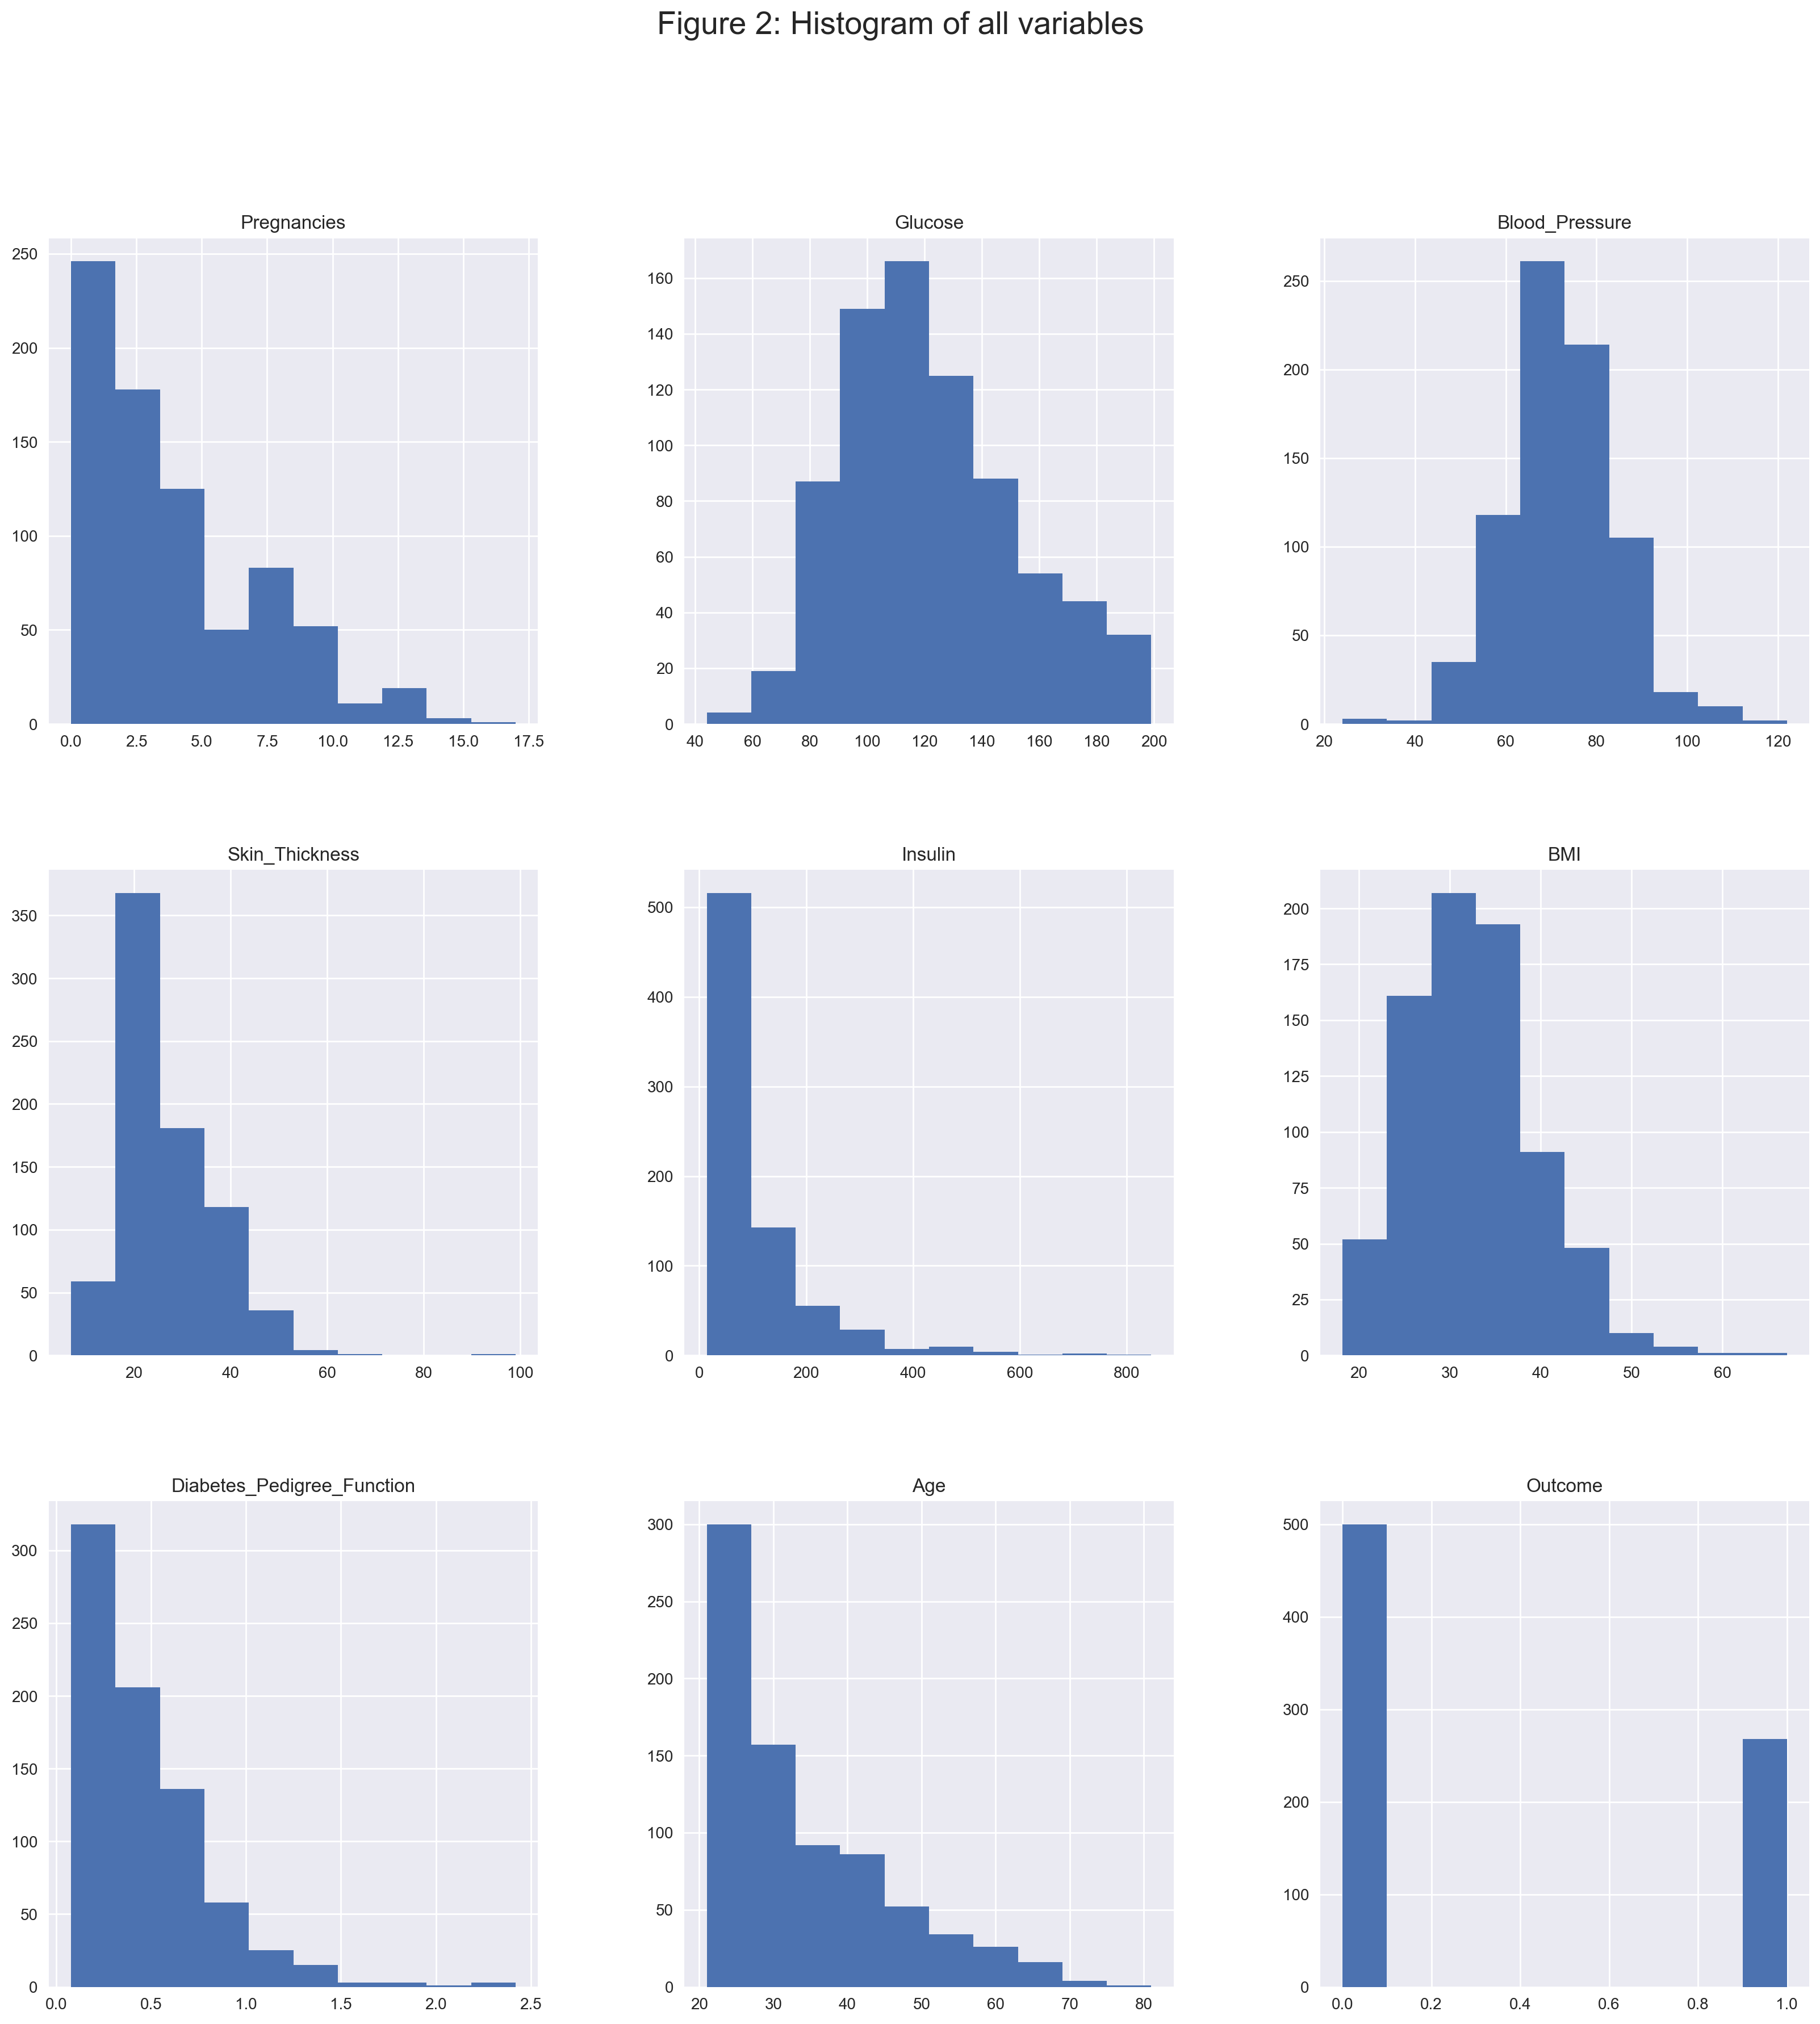

In [16]:
p2 = diabetes.hist(figsize = (20,20))
plt.suptitle('Figure 2: Histogram of all variables', fontsize=20)



Figures 3A and 3B shows the distribution of BMI where the majority of data falls above 25 and more than half above 30, indicating a body mass index of overweight (25) or obesity (30) in subjects of the diabetes dataset as suggested by Centres for Disease Control and Prevention (CDC).

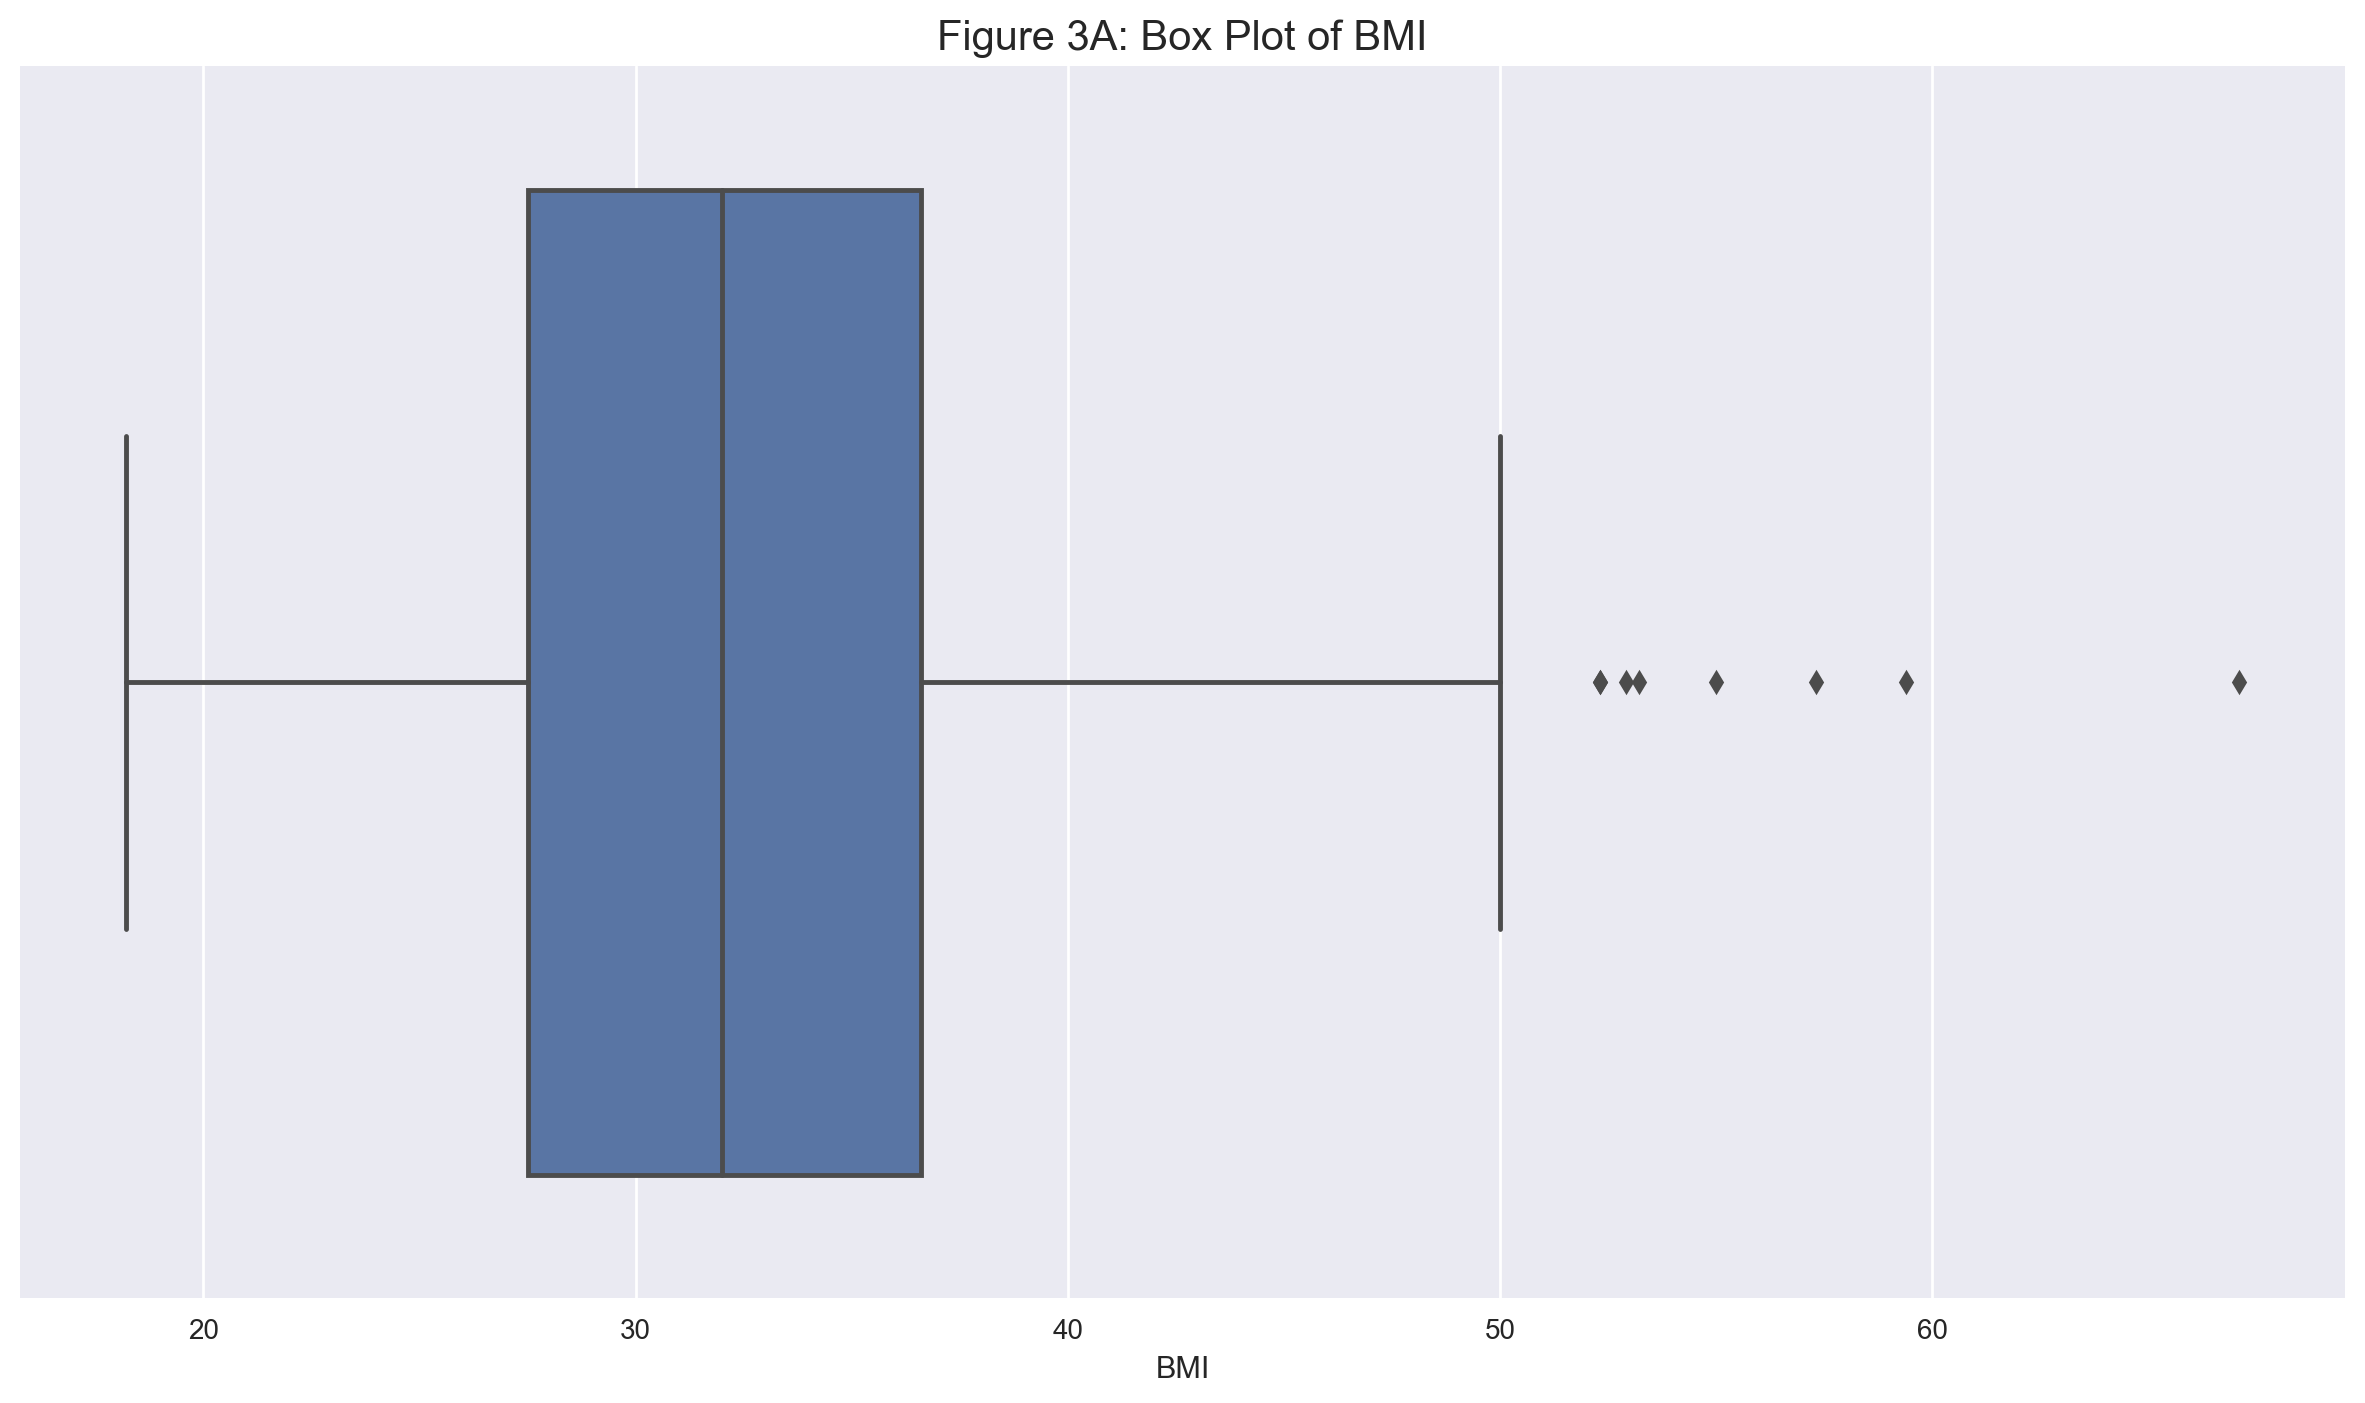

In [17]:
# Boxplot of BMI
plt.figure(figsize = (15,8))
sns.boxplot(diabetes['BMI']).set_title('Figure 3A: Box Plot of BMI', fontsize = 15)
plt.show();

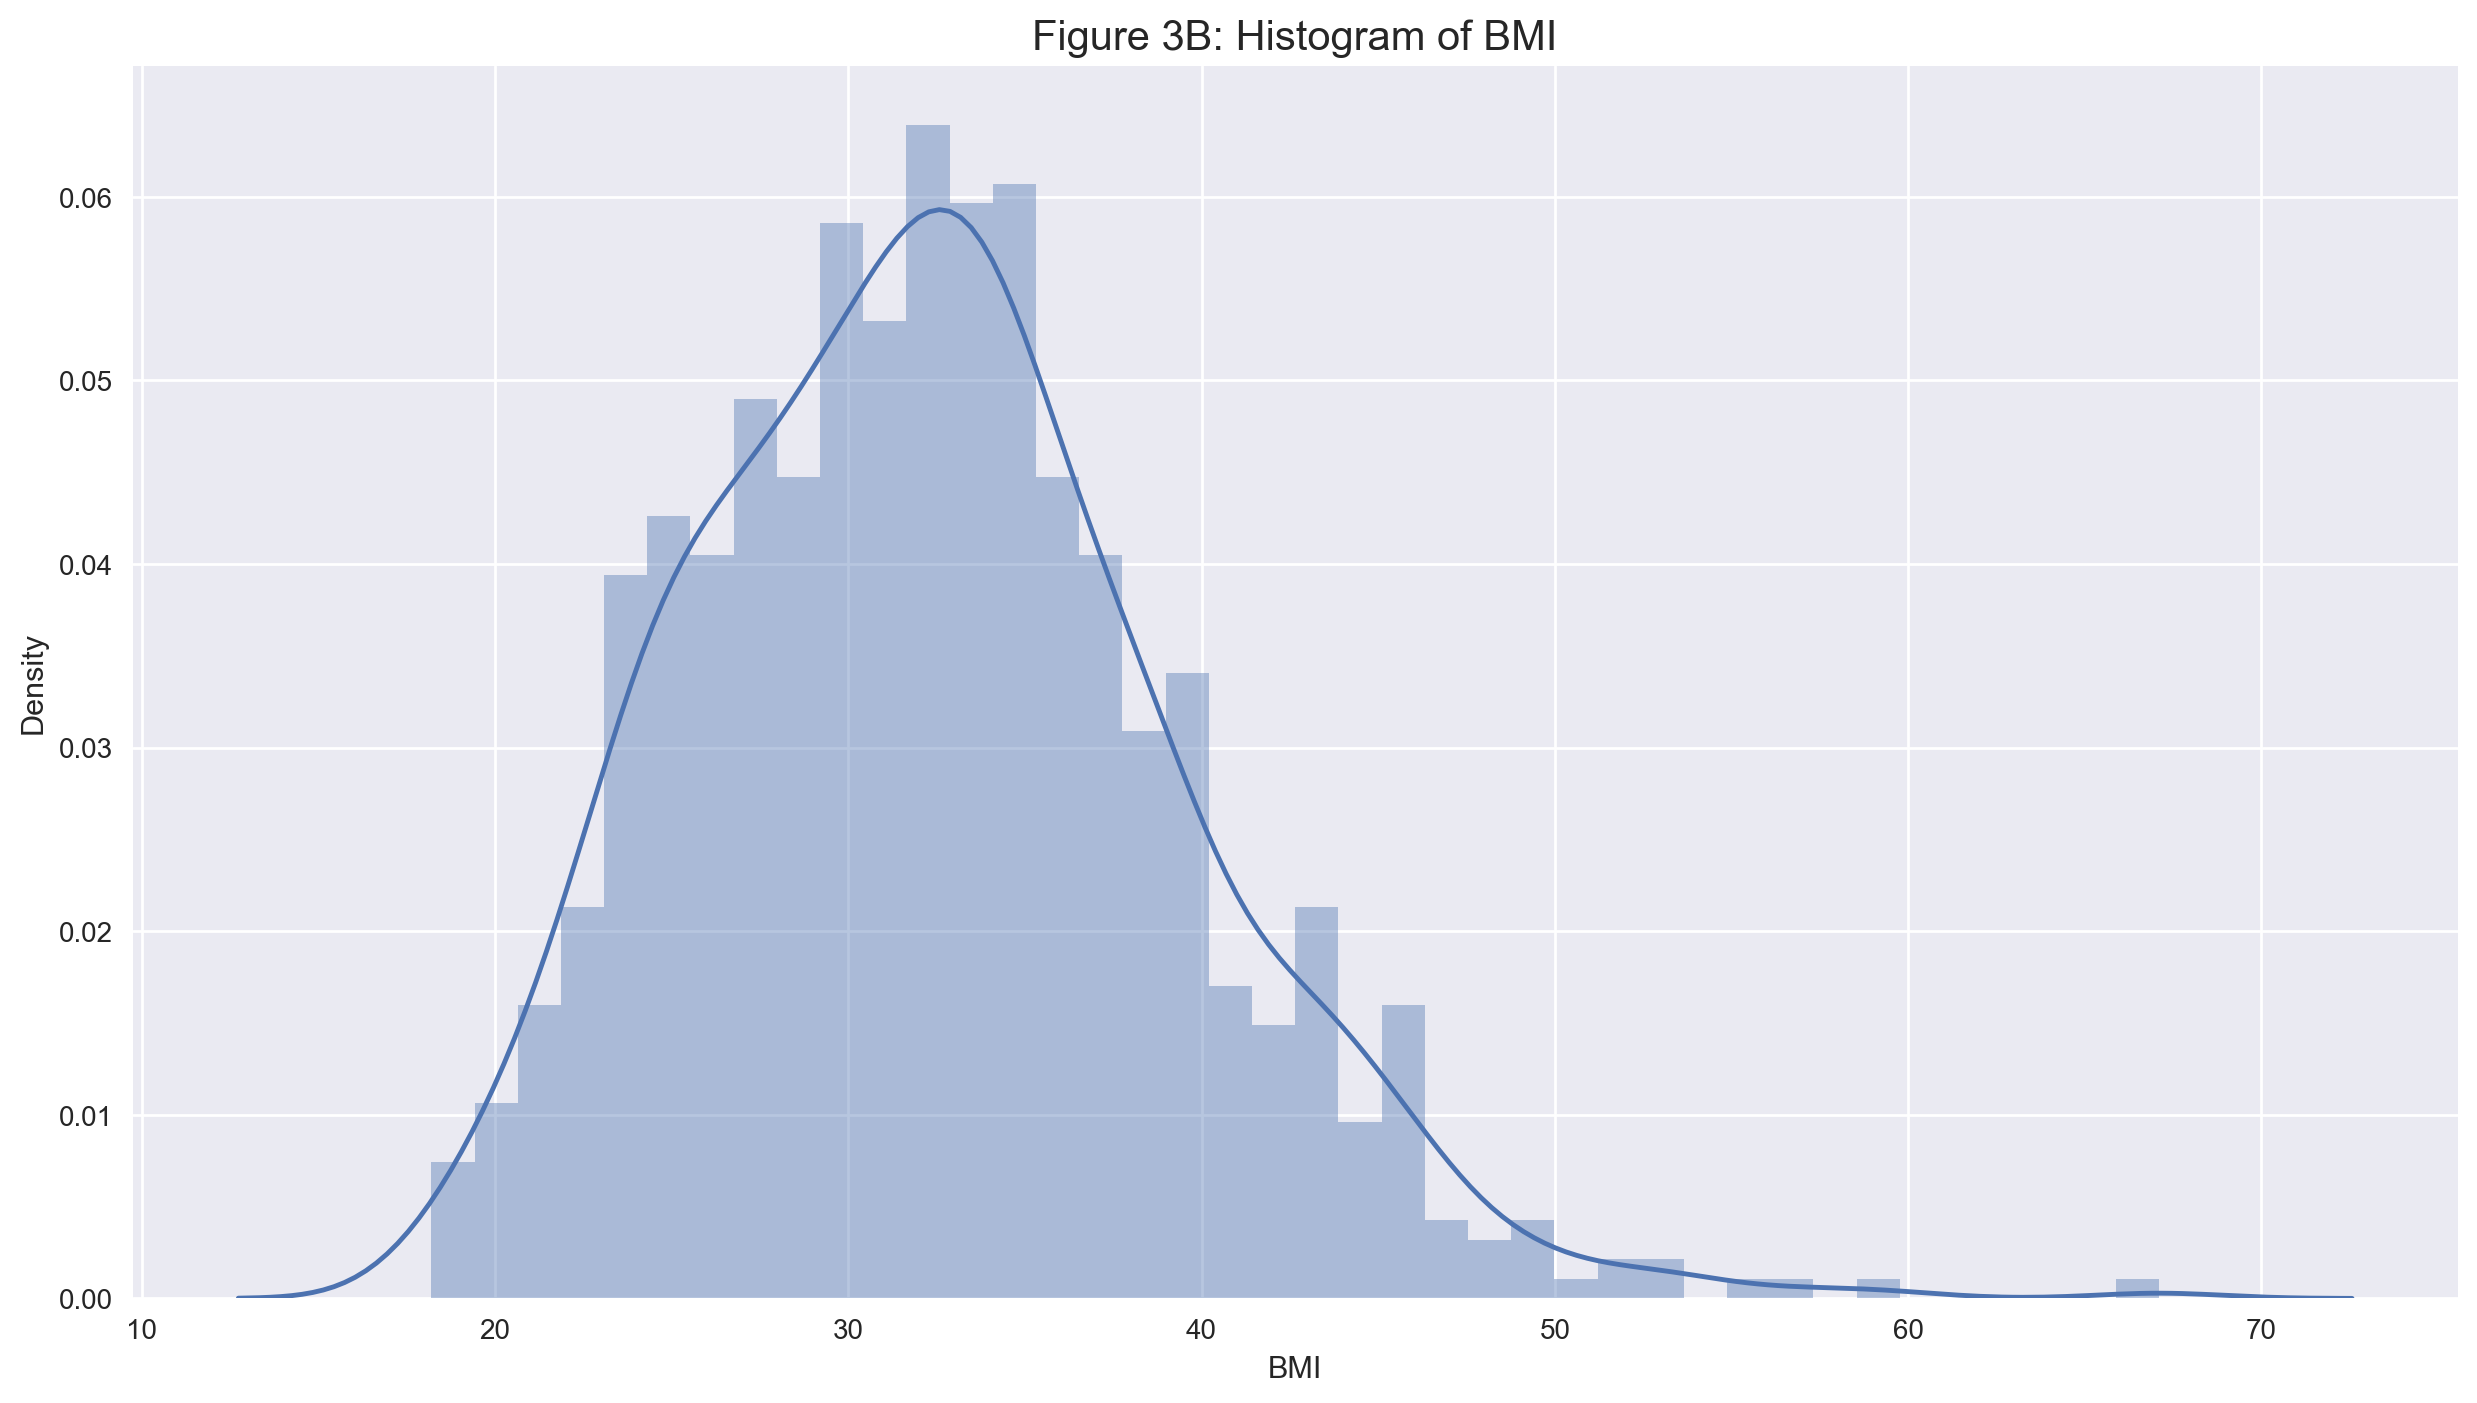

In [18]:
# Histogram of BMI
plt.figure(figsize = (15,8))
sns.distplot(diabetes['BMI'], kde=True, bins=40).set_title('Figure 3B: Histogram of BMI', fontsize = 15)
plt.show();

Figures 4A and 4B shows the distribution of Insulin. Data has a wide range and shows right-skewness. Therefore, data transformation such as log transformation might be needed in Phase 2, for better performance of machine learning algorithms that are more sensitive to normality.

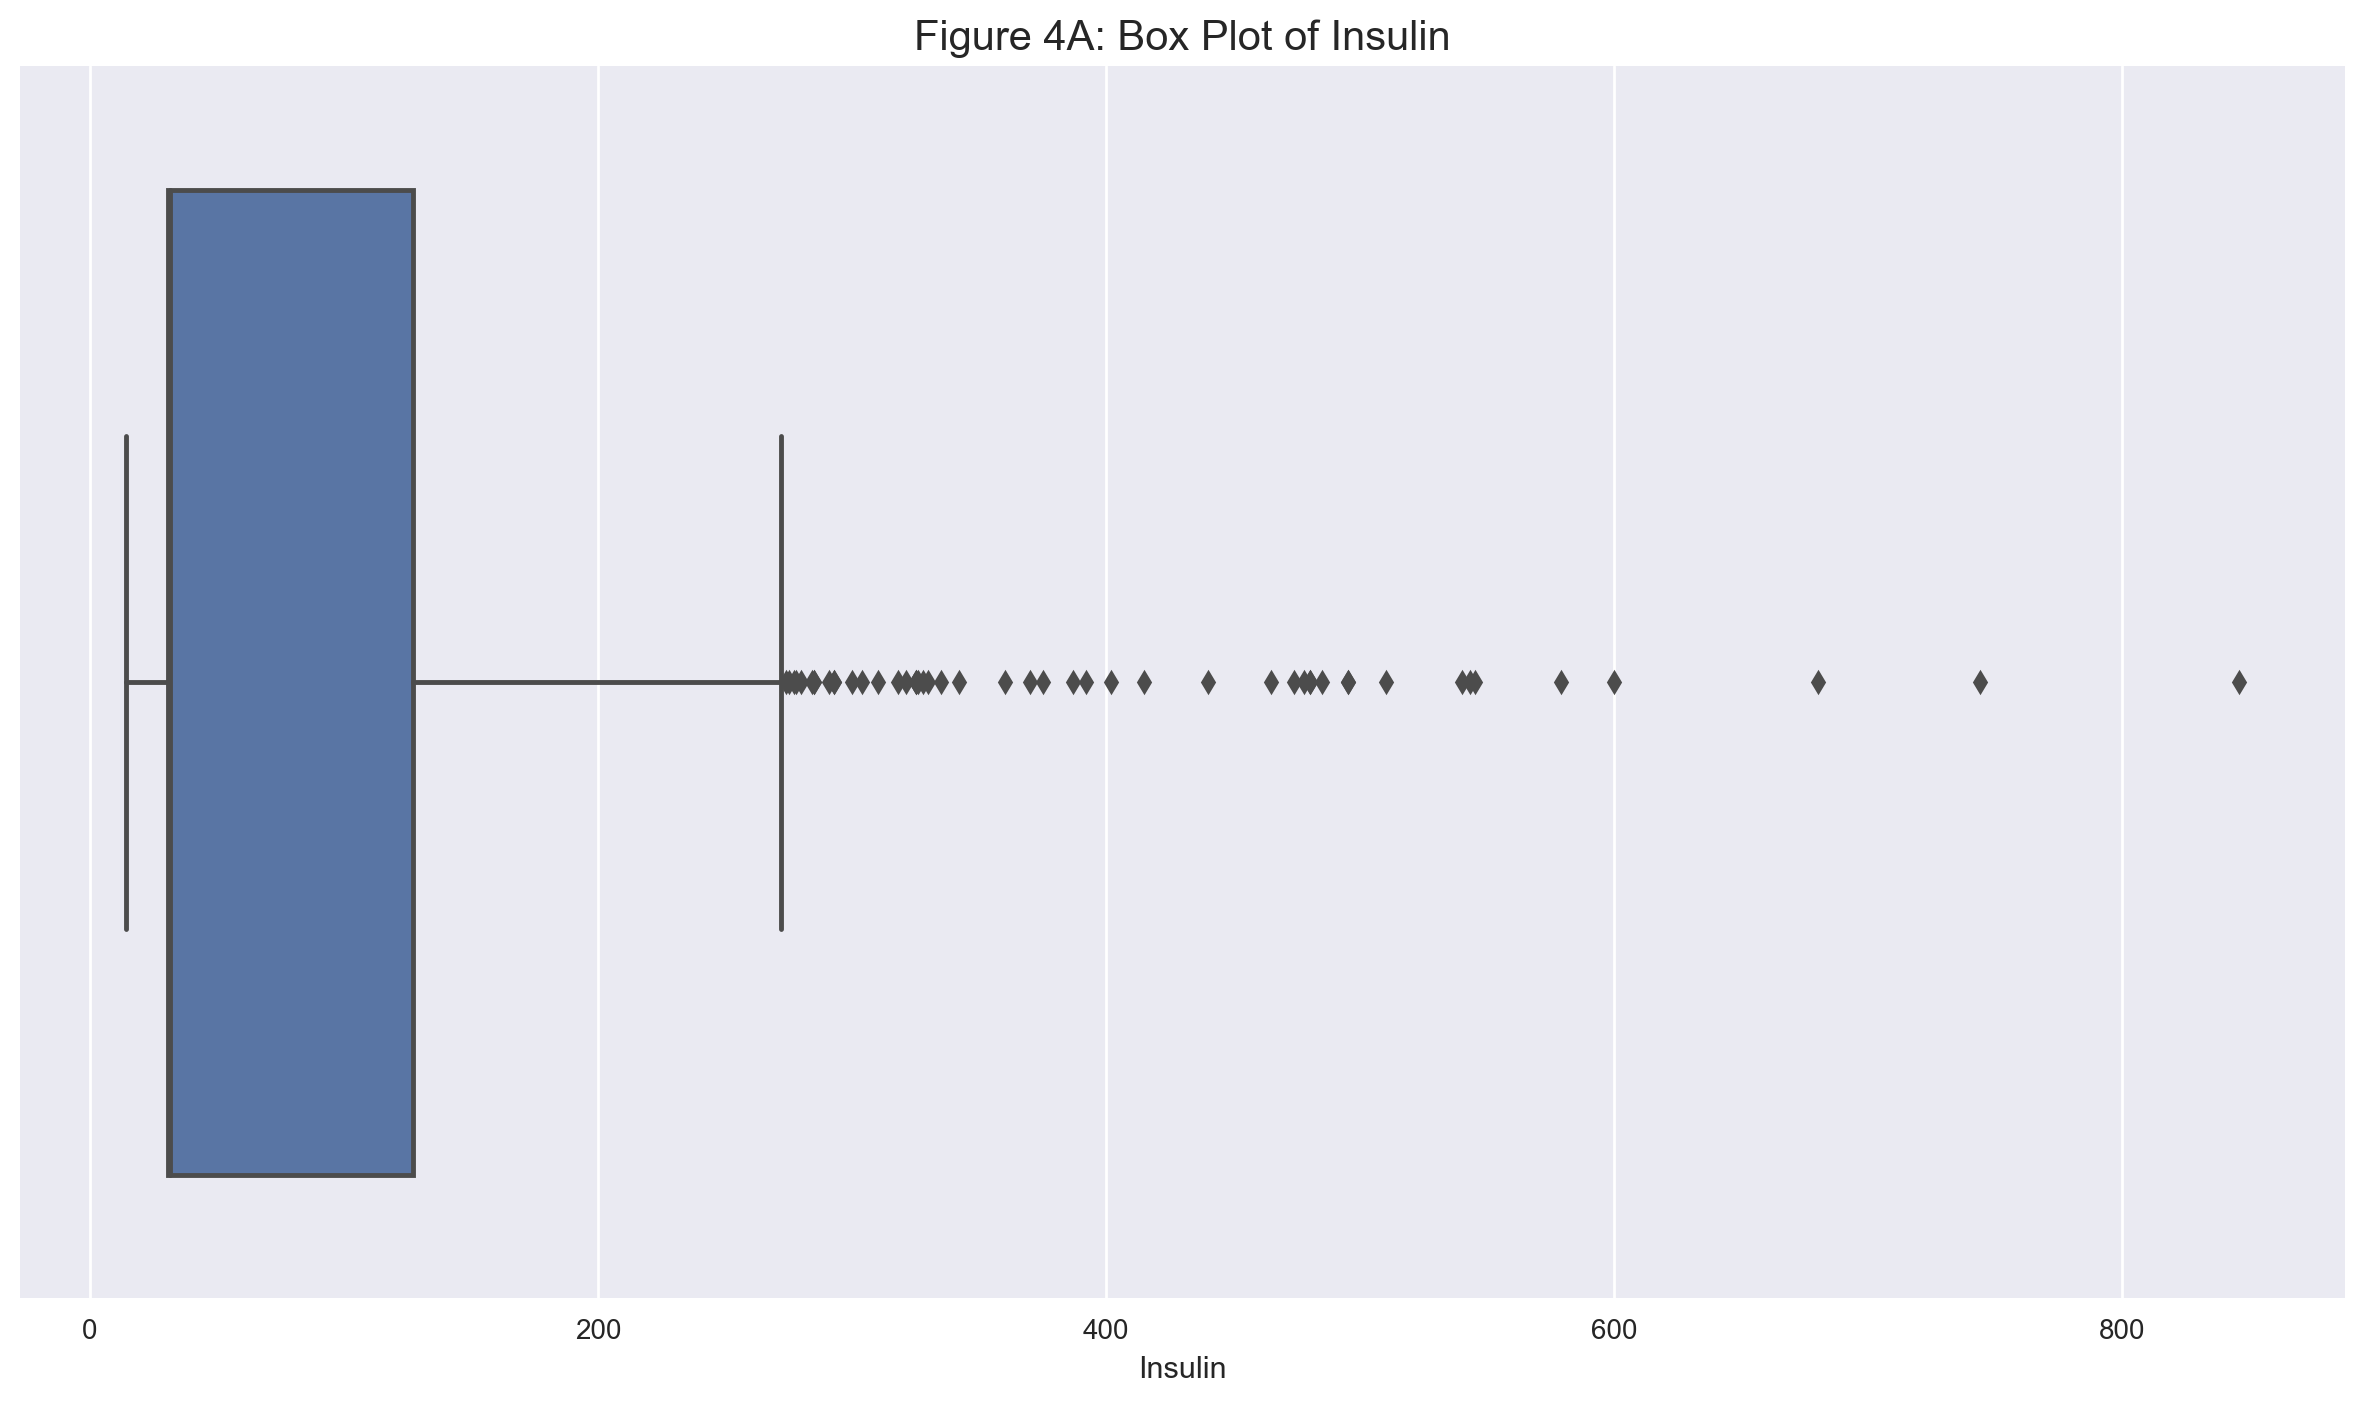

In [19]:
# Boxplot of Insulin
plt.figure(figsize = (15,8))
sns.boxplot(diabetes['Insulin']).set_title('Figure 4A: Box Plot of Insulin', fontsize = 15)
plt.show();

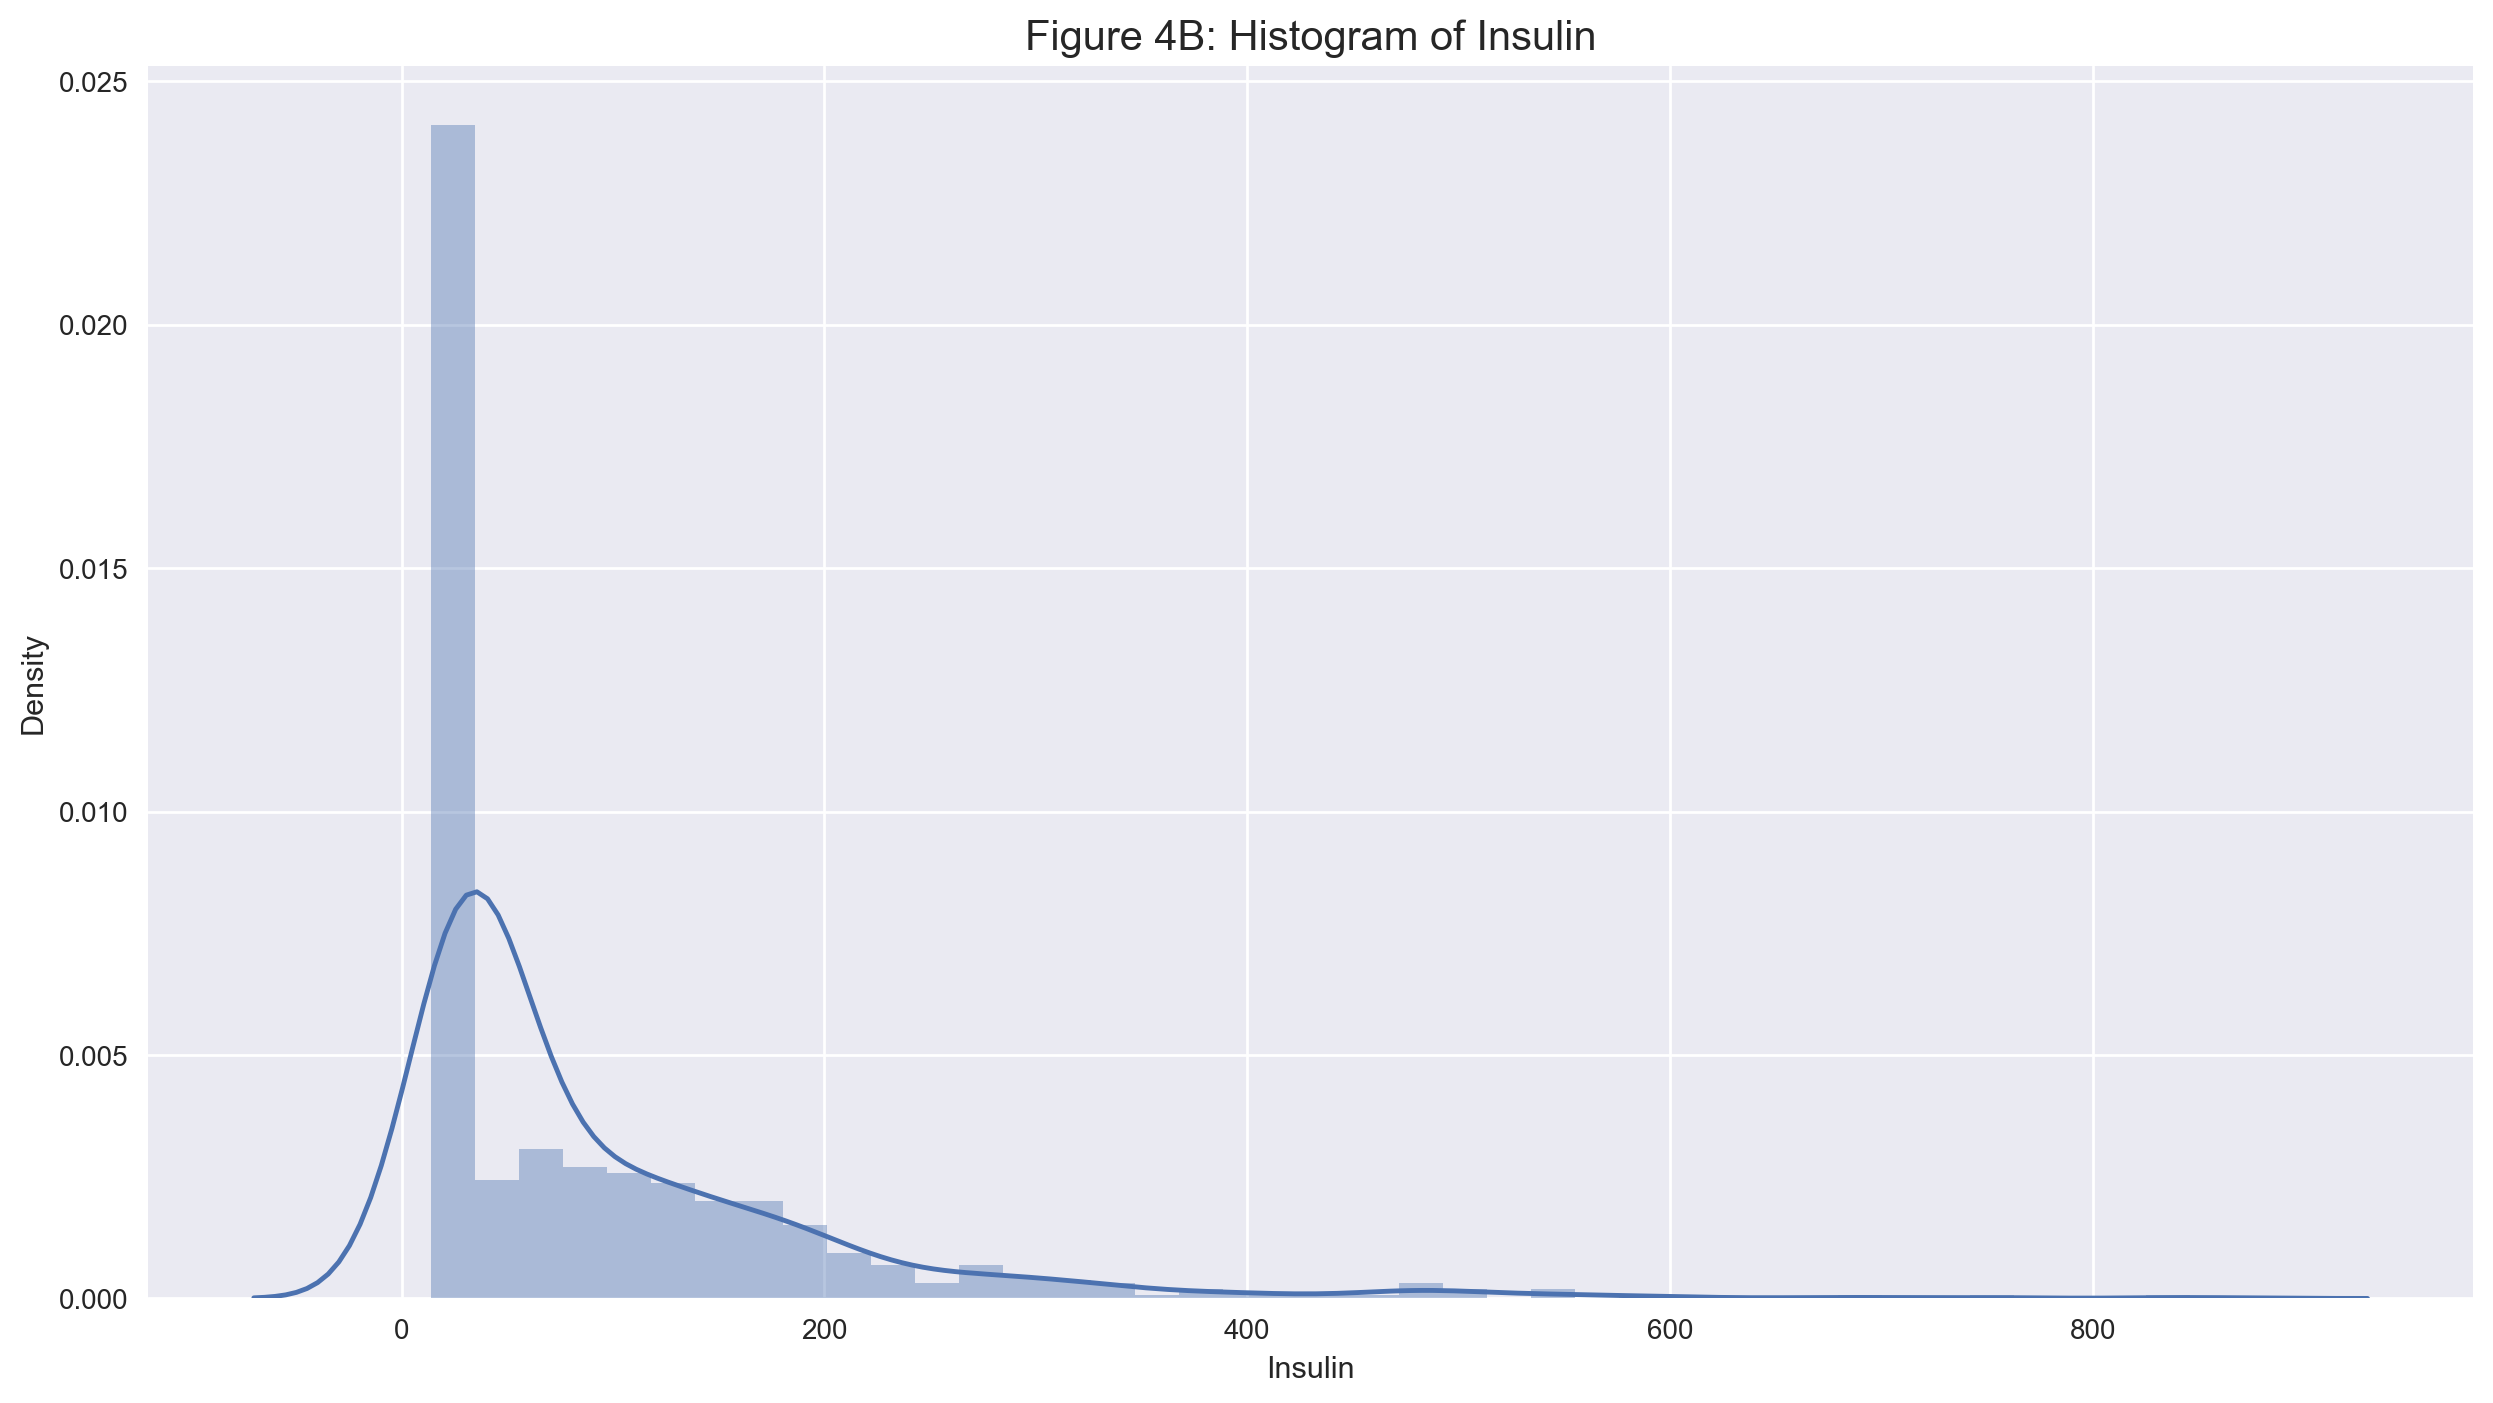

In [20]:
# Histogram of Insulin
plt.figure(figsize = (15,8))
sns.distplot(diabetes['Insulin'], kde=True, bins=40).set_title('Figure 4B: Histogram of Insulin', fontsize = 15)
plt.show();

### Two-variable Visualisation

We now move on to investigate relationship between each two variables. Figure 5 shows a scatter matrix for all variables in the diabetes data. Visual inspection of Figure 5 indicates a weak to moderate linear relationship between `BMI` and `Skin_Thickness`, and `Pregnancies` and `Age`.


Text(0.5, 1.05, 'Figure 5: Scatter matrix of diabetes data')

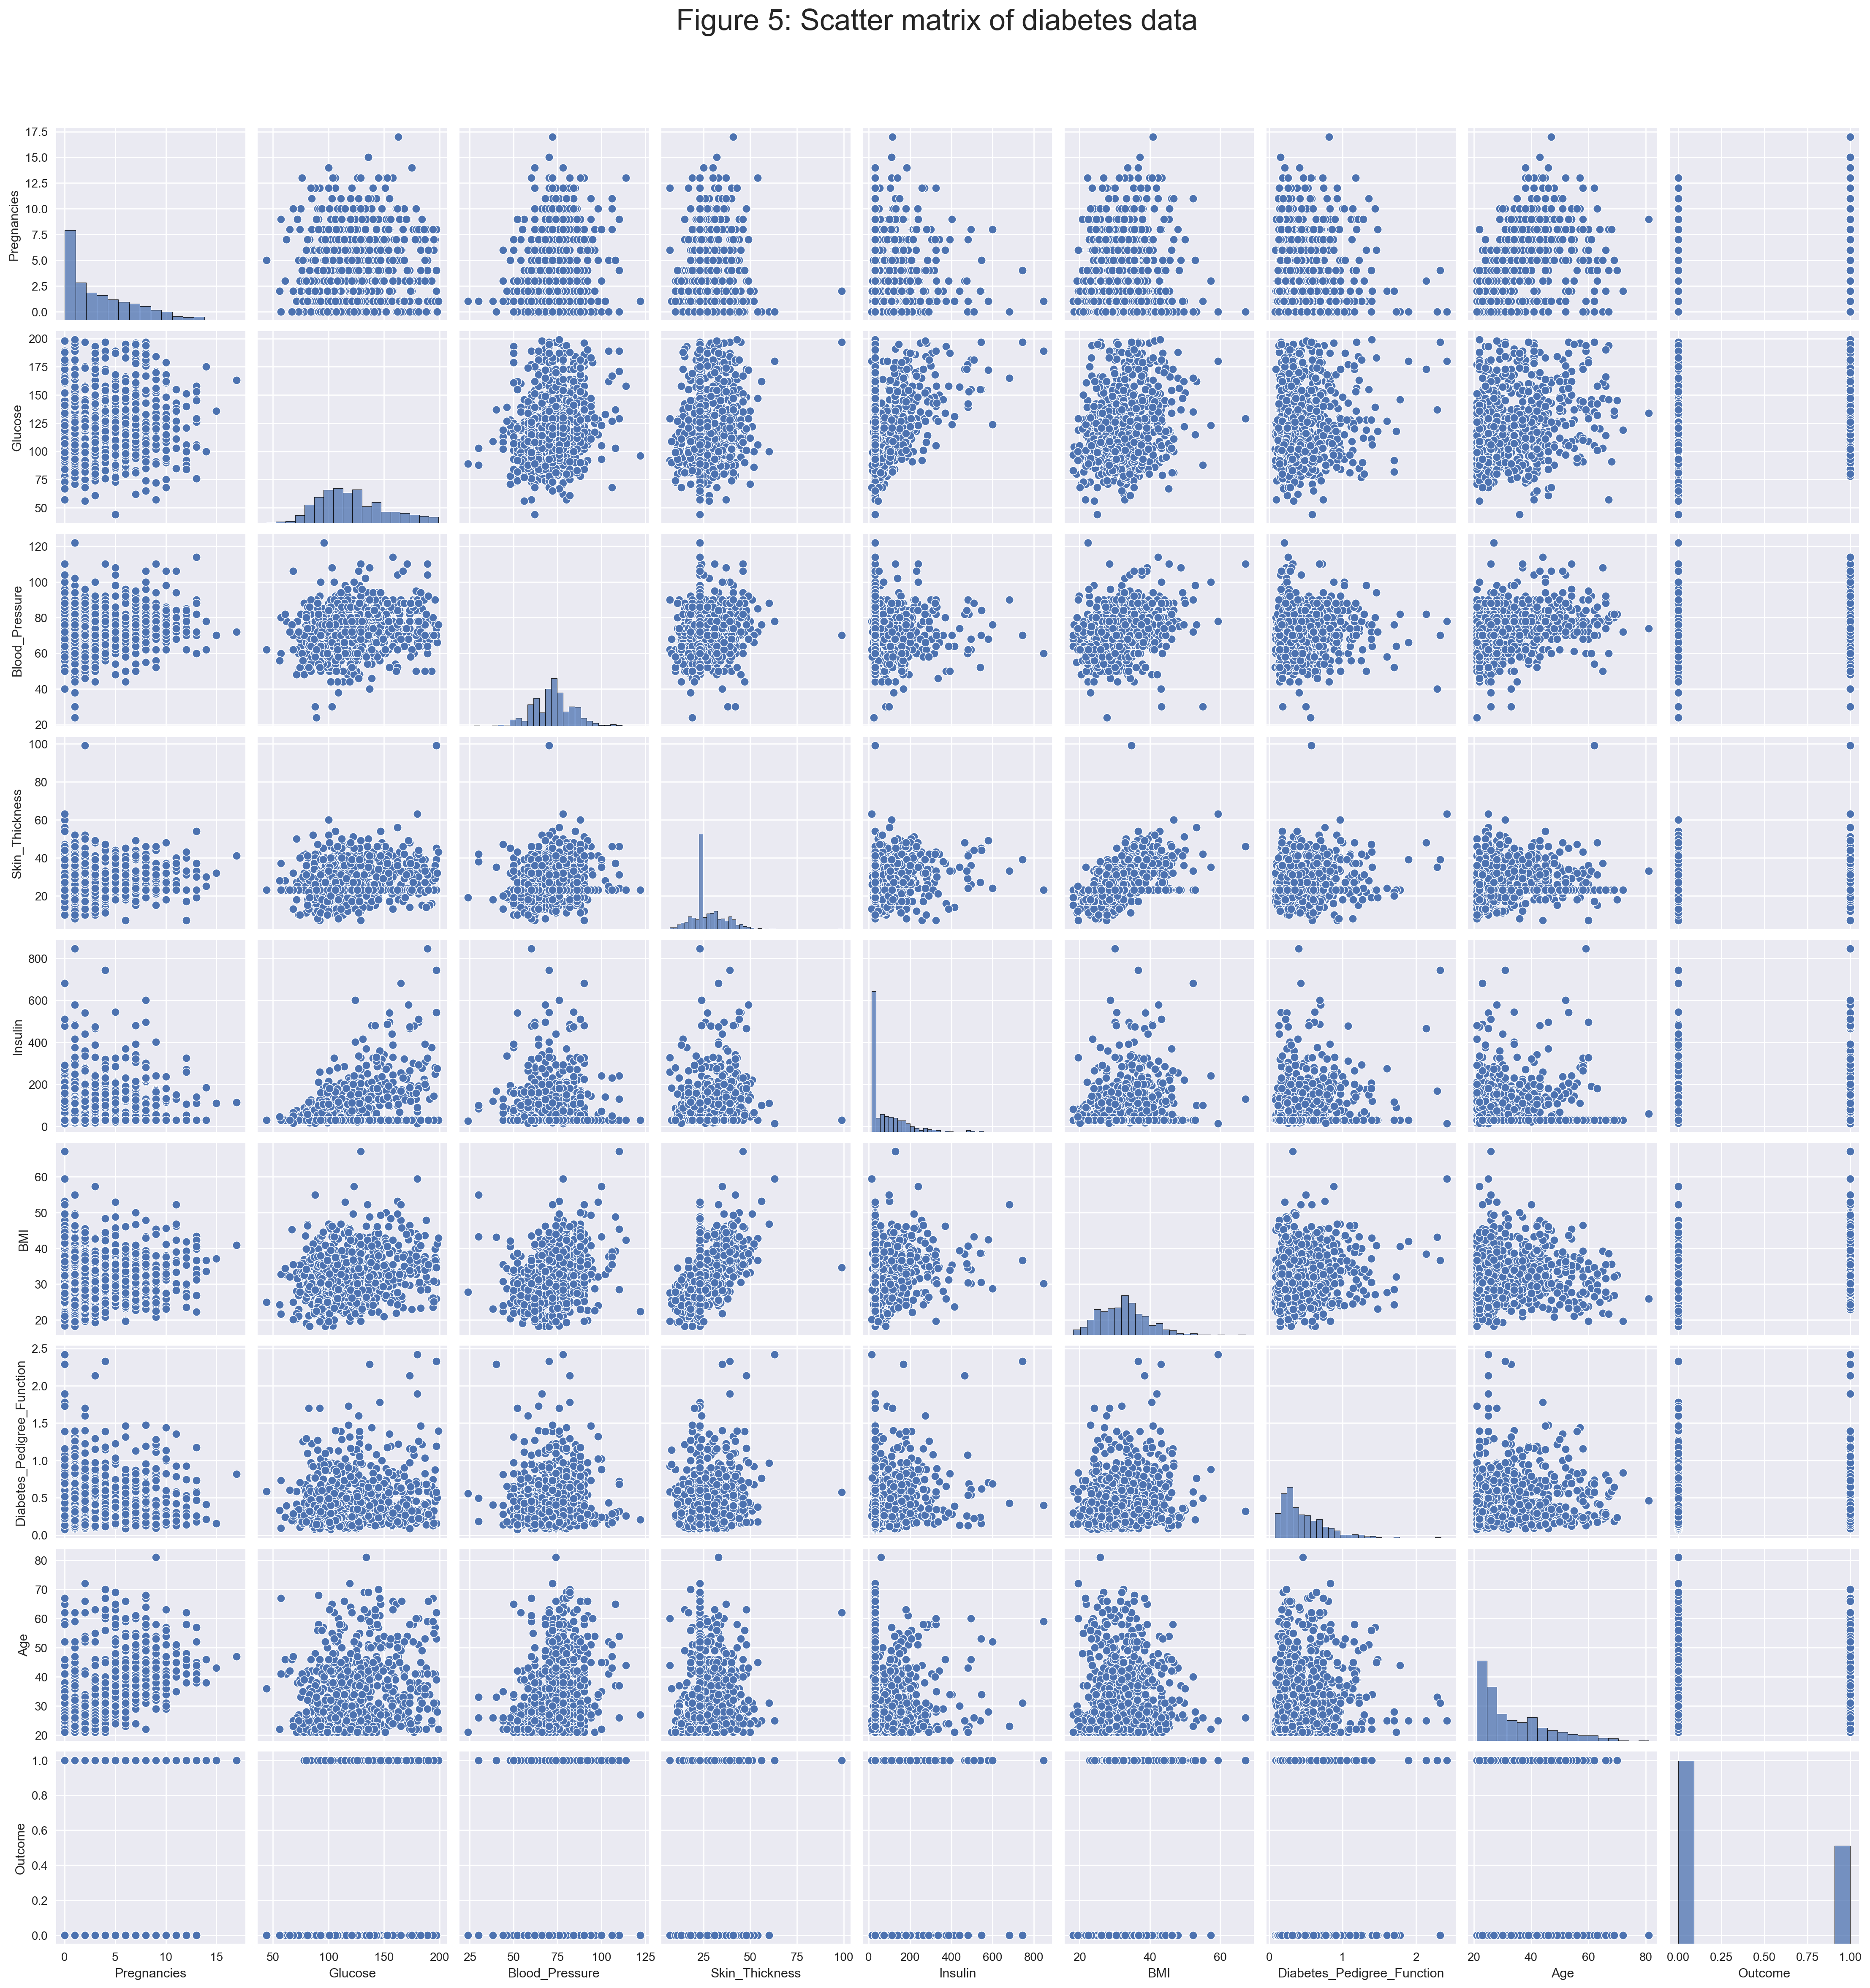

In [21]:
sns.pairplot(diabetes)
plt.suptitle('Figure 5: Scatter matrix of diabetes data', y = 1.05, fontsize=25)



To further investigate the correlation between between each variables and measure strength of linear relationship, a heatmap was plotted in Figure 6 of correlation coefficients coded by color. With the cmap parameter set to 'Blues', a correlation coefficient r=1 is represented with dark blue, and the blue shade gets lighter as the correlation coefficient decreases, indicating a weaker linear relationship.

Figure 6 shows moderate positive linear relationship between `BMI` and `Skin_Thickness` (r=0.55), and between `Pregnancies` and `Age` (r=0.54) which supports our inspection of Figure 5. Other pairs that have moderate positive linear relationship include `Glucose` and `Insulin` (r=0.36), `Blood_Pressure` and `Age` (r=0.32), `Glucose` and `Outcome` (r=0.49), and `BMI` and `Outcome` (r=0.31). Weak linear relationship exists for the rest of paired variables with both positive and negative correlations.

Since body mass index (`BMI`), `Age`, family history (measured by `Diabetes_Pedigree_Function`), and high blood pressure (`Blood_Pressure`) are found to be high risk factors for diabetes (CDC, n.d.), we will visualise these variables and explore their relationship with the `Glucose`(GTT measurement for diabetes).


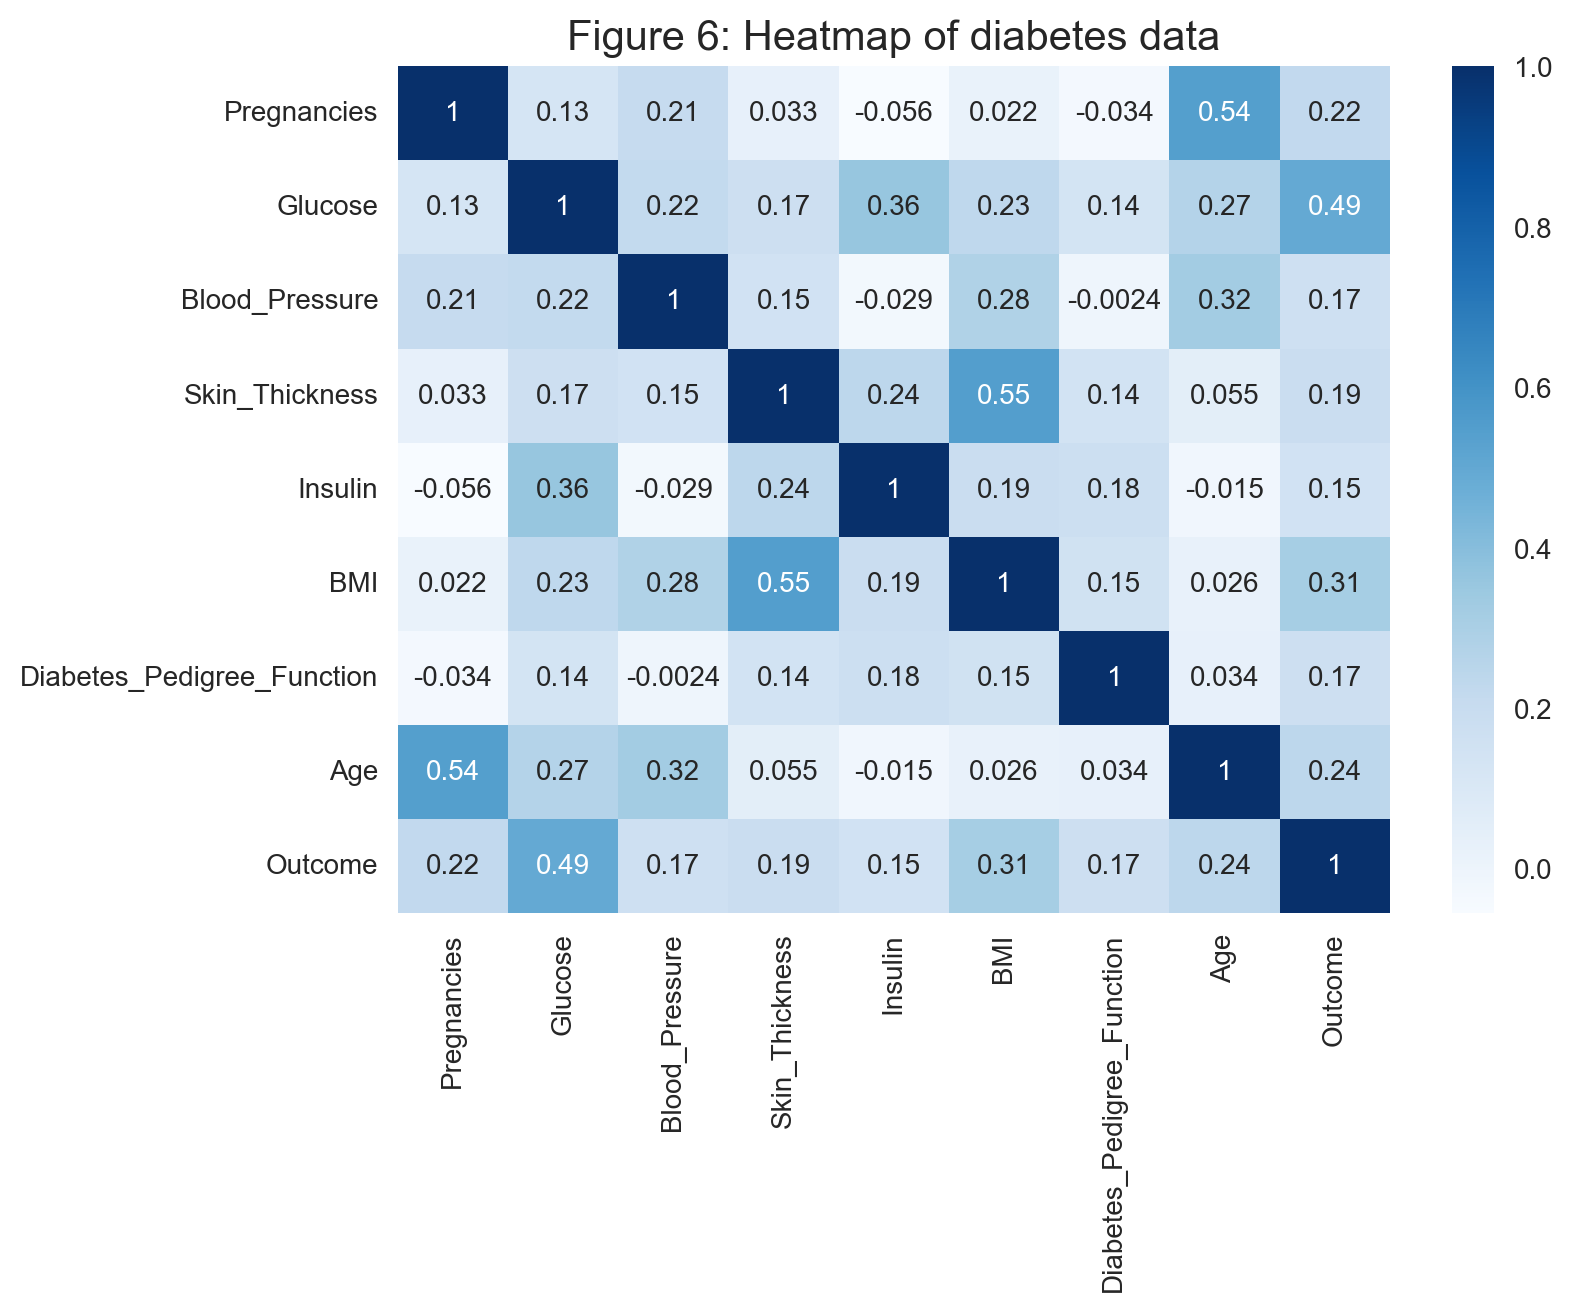

In [22]:
corr_matrix = diabetes.corr()
sns.heatmap(corr_matrix, cmap = 'Blues', annot = True).set_title('Figure 6: Heatmap of diabetes data', fontsize = 15)
plt.show()

Figure 7 shows the relationship between `BMI` and `Glucose`, and Figure 8 shows the relationship between `Diabetes_Pedigree_Function` and `Glucose`. Both Figure 7 and 8 indicates a weak positive linear relationship. However, it is unclear how the output differs for each class of the target feature `Outcome`. 

We will now include the `Outcome` variable in the visualisation and produce three-variable plots.

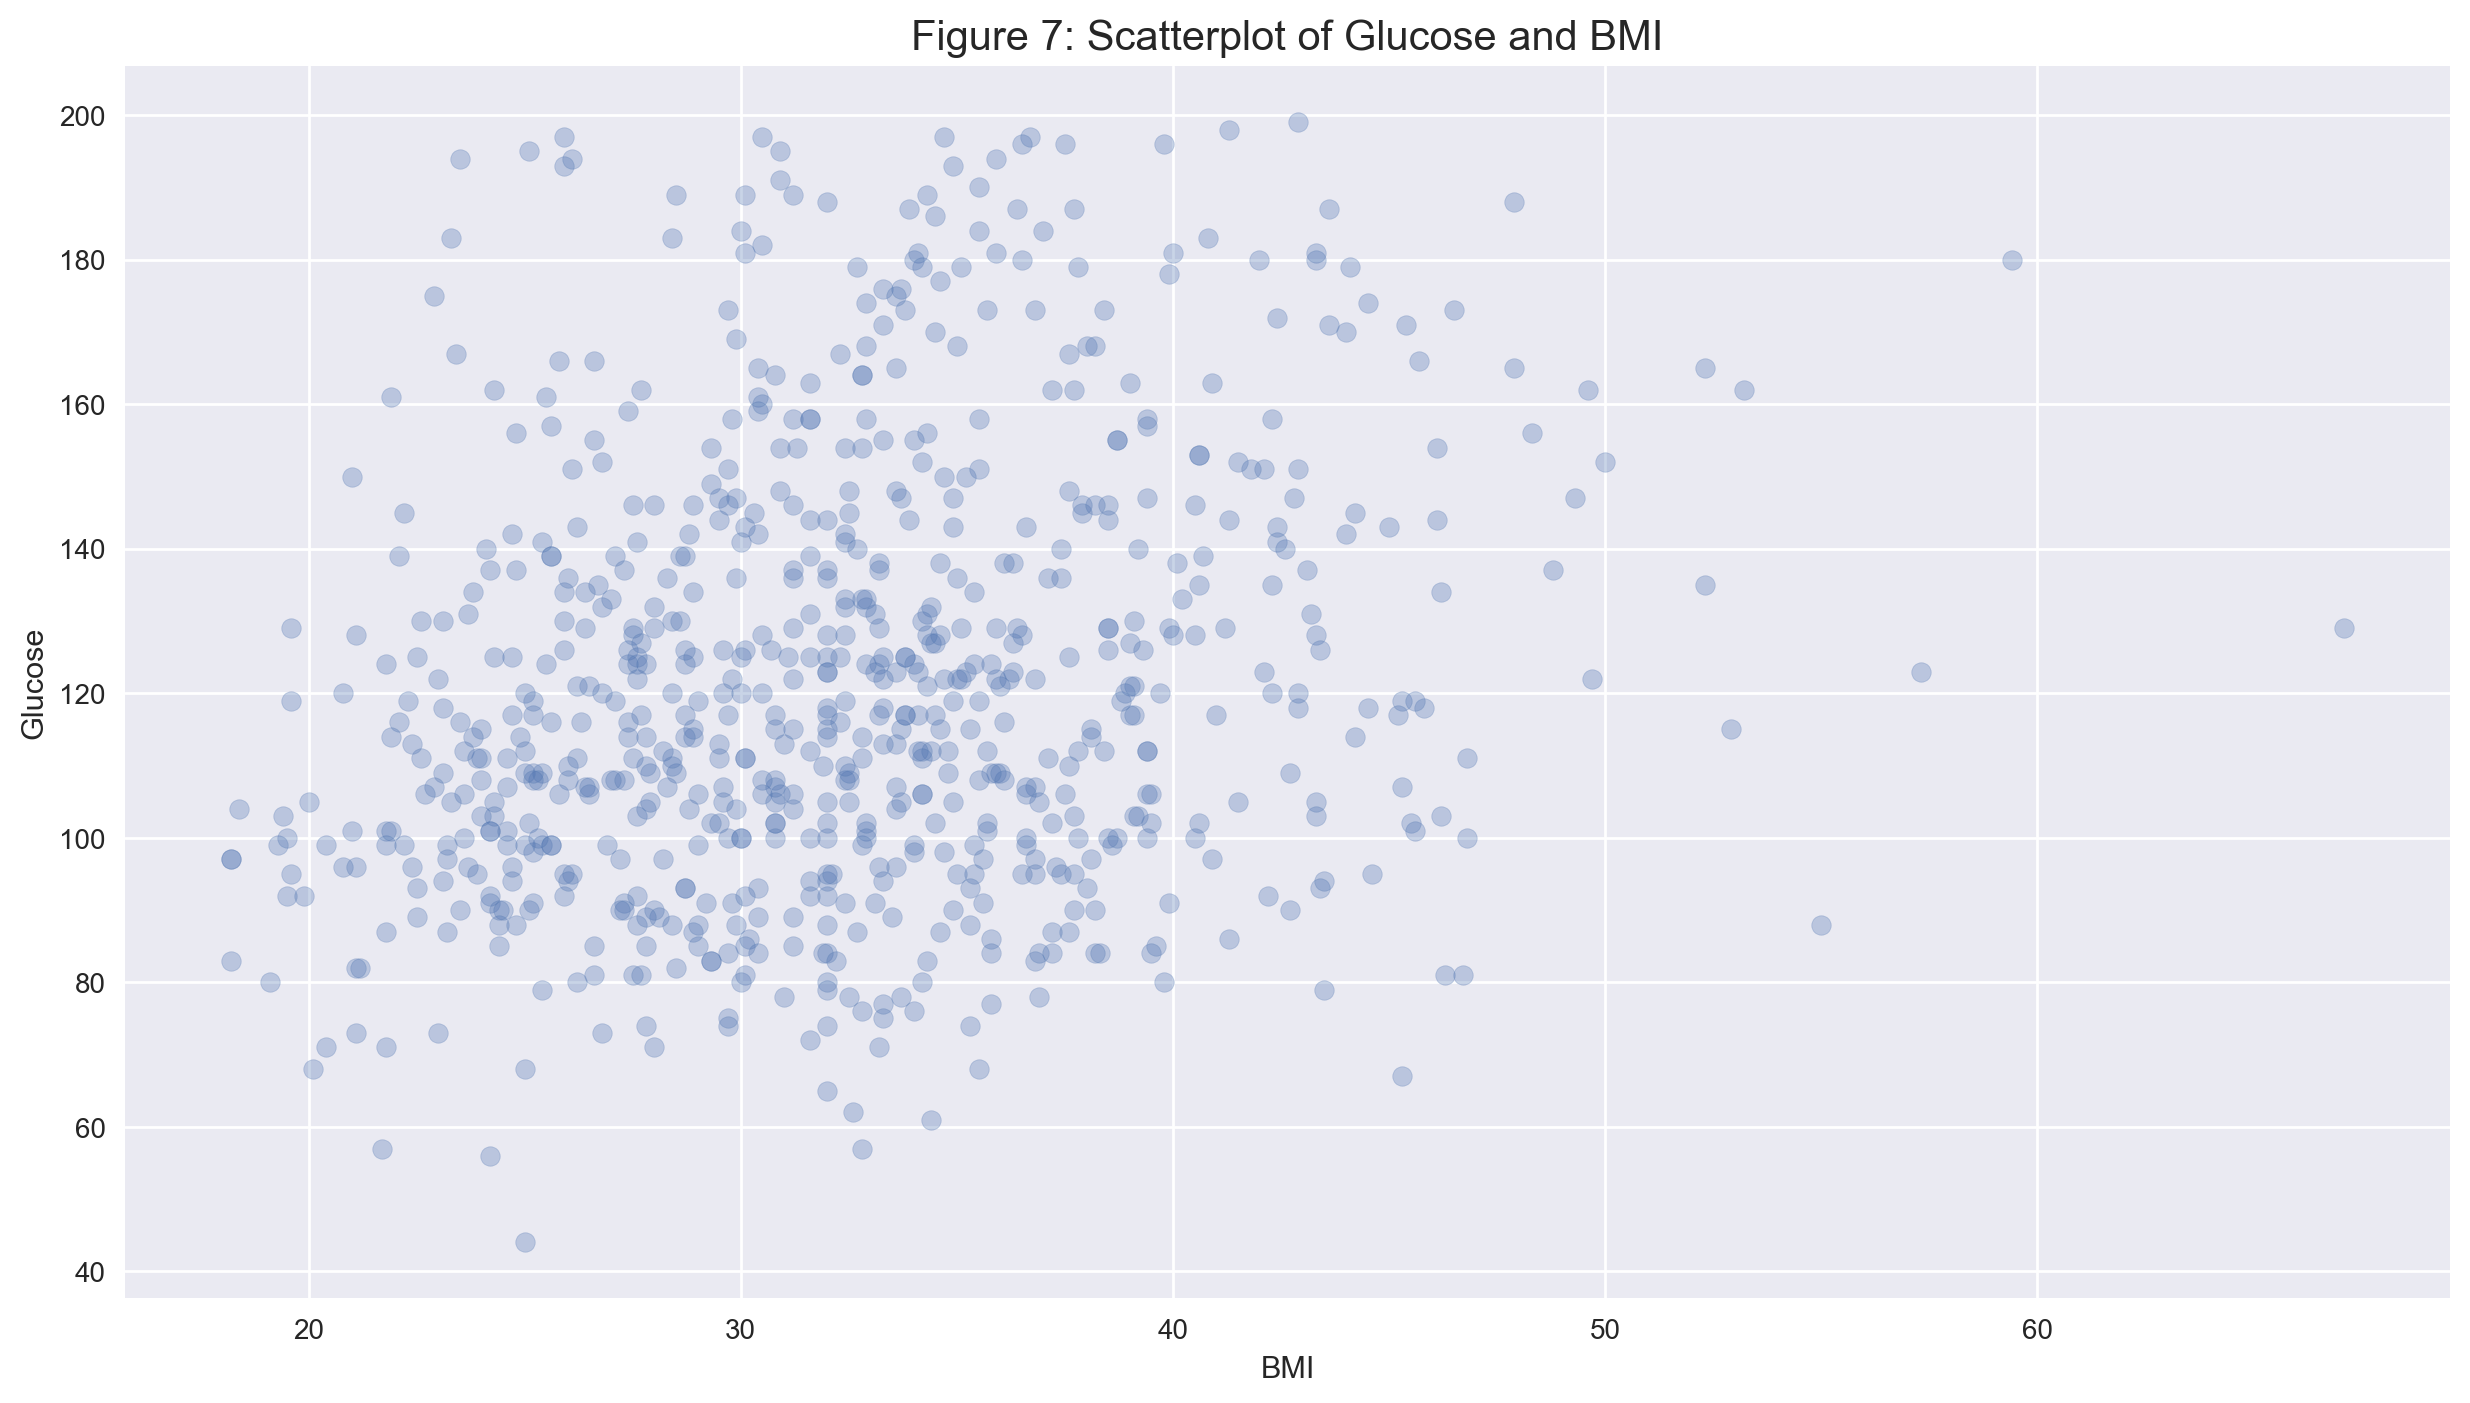

In [23]:
# BMI and Glucose
plt.figure(figsize = (15,8))
plt.scatter(diabetes['BMI'], diabetes['Glucose'], alpha = 0.3)
plt.title('Figure 7: Scatterplot of Glucose and BMI', fontsize = 15)
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show();

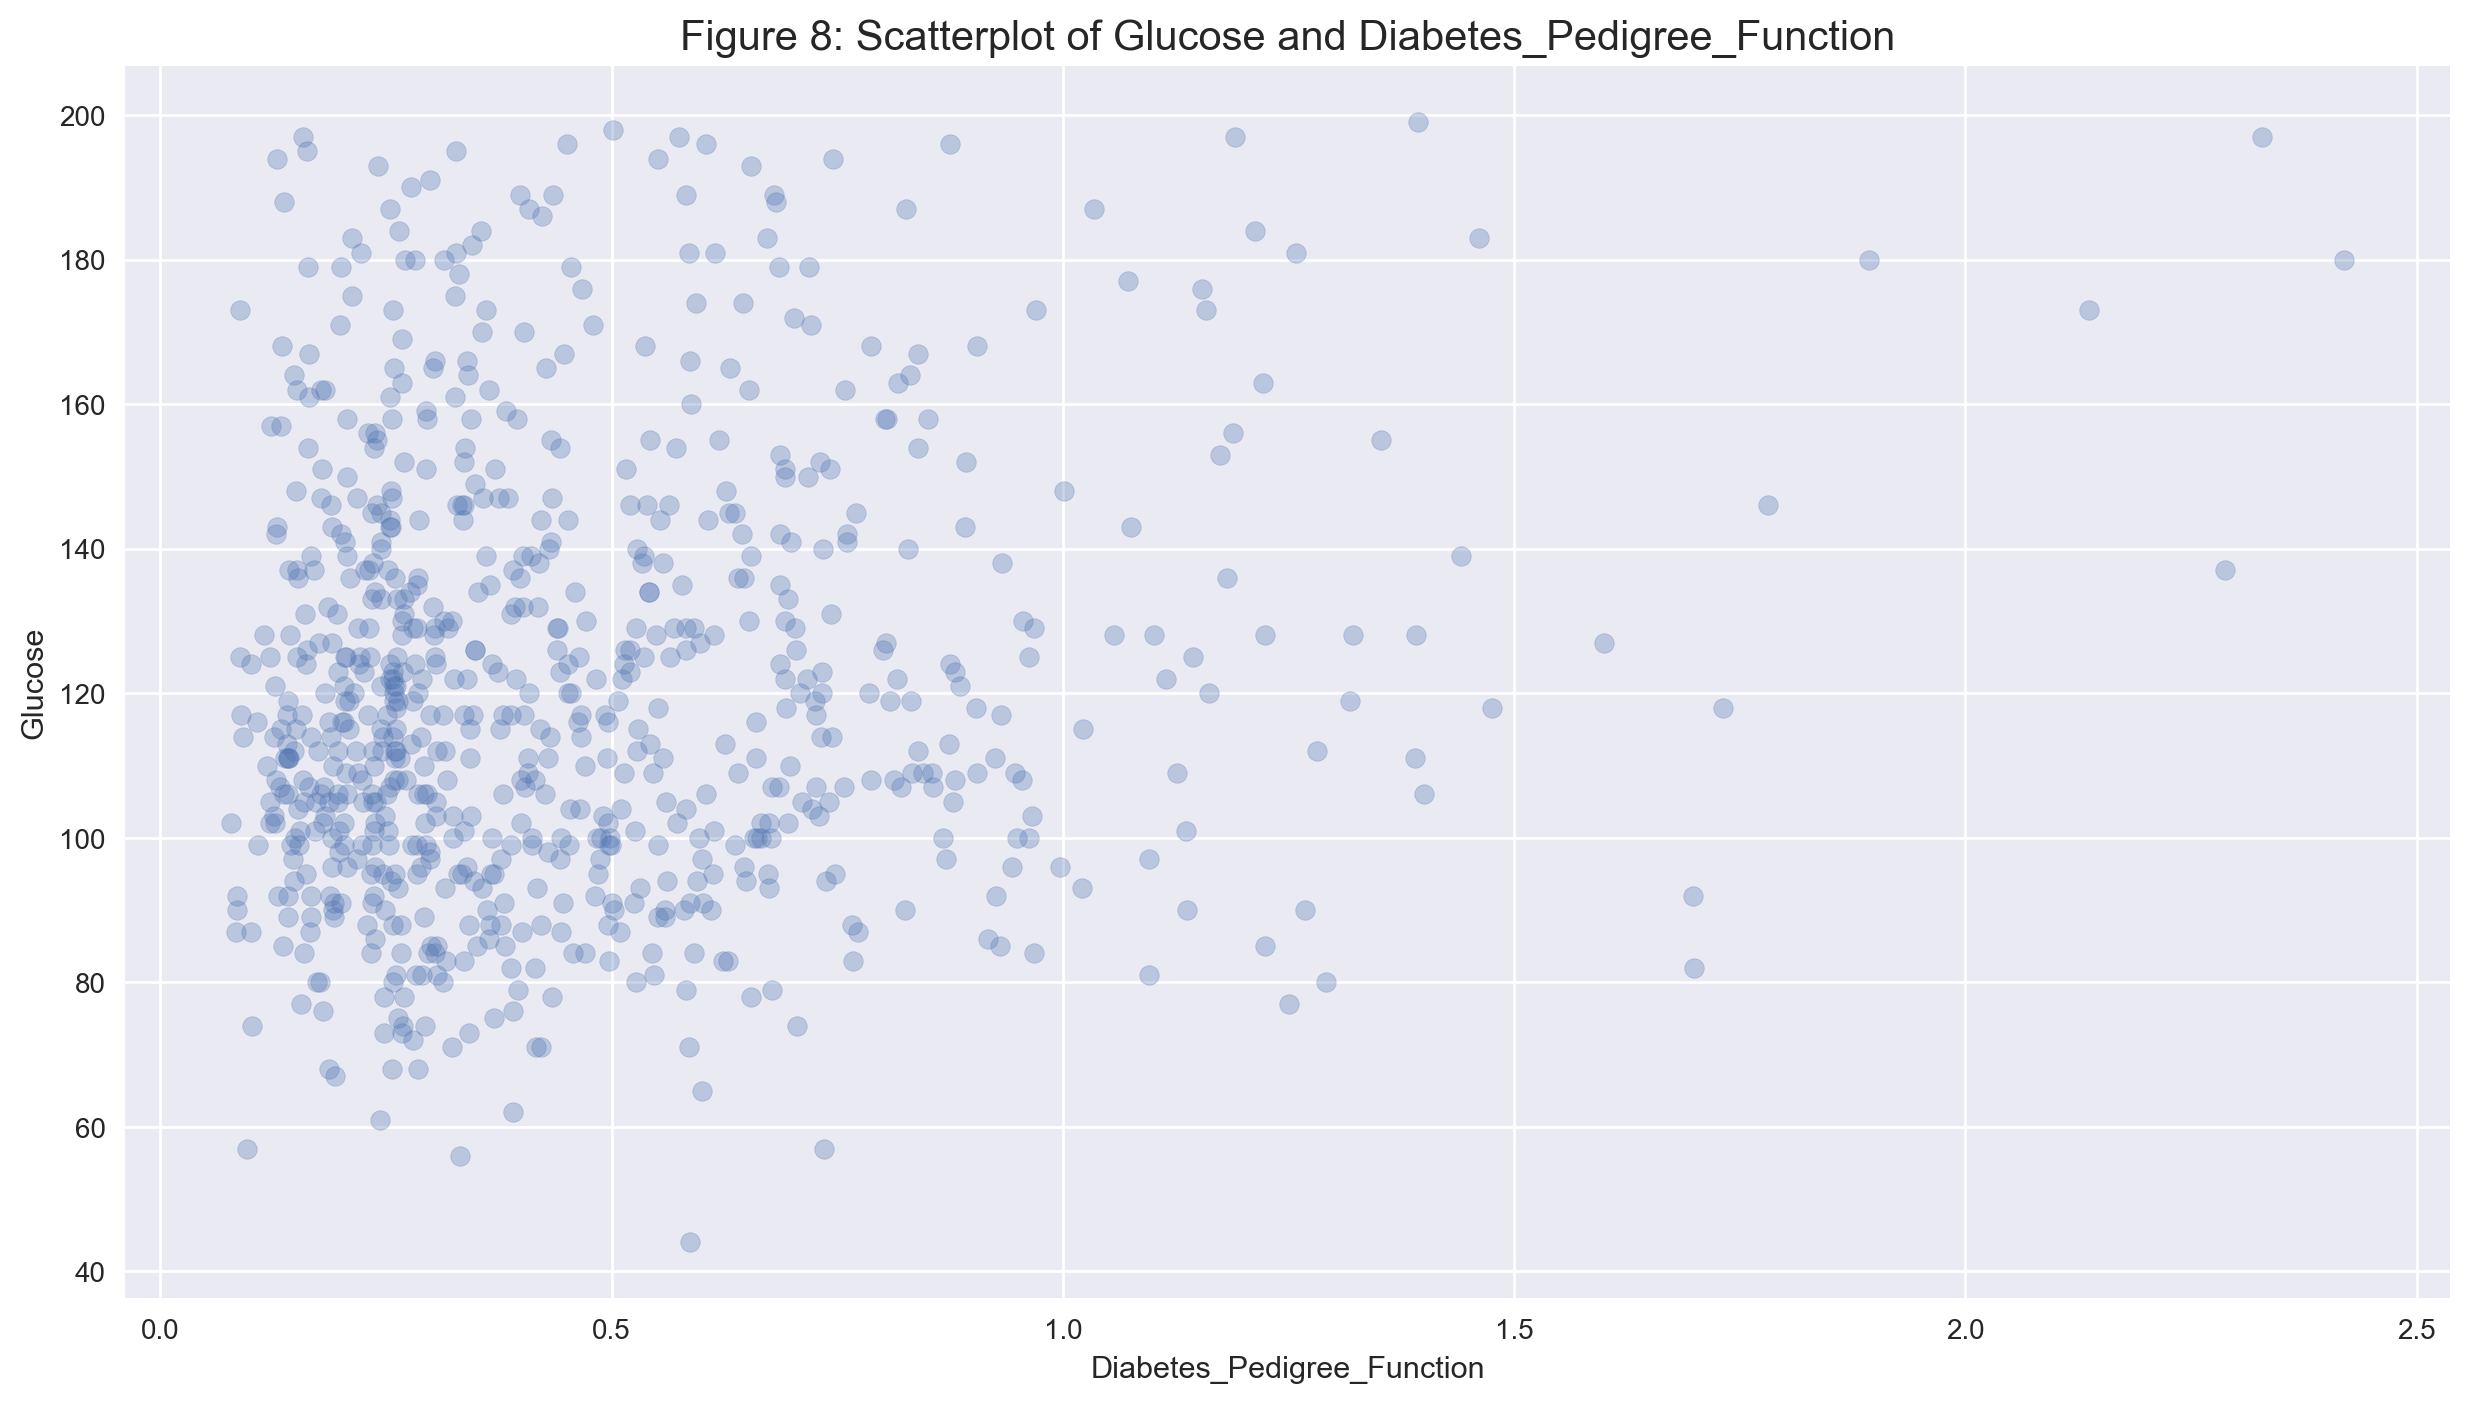

In [24]:
# Diabetes_Pedigree_Function and Glucose
plt.figure(figsize = (15,8))
plt.scatter(diabetes['Diabetes_Pedigree_Function'], diabetes['Glucose'], alpha = 0.3)
plt.title('Figure 8: Scatterplot of Glucose and Diabetes_Pedigree_Function', fontsize = 15)
plt.xlabel('Diabetes_Pedigree_Function')
plt.ylabel('Glucose')
plt.show();

### Three-variable Visualisation

As stated in the previous section, `Outcome` is added to three-variable visualisations, where different classes within `Outcome` are plotted as different colors. Patients who are diagnosed with diabetes within 5 years of examination have `Outcome` variable equals 1, which are colored yellow. Patients who were not found with diabetes after 5 years of examination are colored blue, with a value 0 for the `Outcome` variable. 

Figure 9 shows a three-variable scatter plot for `Glucose`, `BMI` and `Outcome`. 
The output for both `Glucose` and `BMI` is relatively higher for patients diagnosed with diabetes within 5 years, where `Outcome`=1.

In [25]:
# BMI, Glucose, and Outcome
import plotly.io as pio
pio.renderers.default = "notebook_connected"
p3 = px.scatter(diabetes, x="BMI", y="Glucose",
                color="Outcome",
                  log_x=True, size_max=60)
p3.update_layout(
    title="Figure 9: Scatterplot of Glucose vs BMI by Outcome",
    xaxis_title="BMI",
    yaxis_title="Glucose"
)

p3.show()

Figure 10 shows a three-variable scatter plot for `Diabetes_Pedigree_Function`, `Glucose` and `Outcome`. The output for `Glucose` is relatively higher for patients colored in yellow, whose `Outcome` variable equals 1, but the difference is not as evident for the `Diabetes_Pedigree_Function` variable.

In [26]:
# Diabetes_Pedigree_Function, Glucose and Outcome
p3_5 = px.scatter(diabetes, x="Diabetes_Pedigree_Function", y="Glucose",
	   
                color="Outcome",
                  log_x=True, size_max=60)
p3_5.update_layout(
    title="Figure 10: Scatterplot of Glucose vs Diabetes_Pedigree_Function by Outcome",
    xaxis_title="Diabetes_Pedigree_Function",
    yaxis_title="Glucose"
)

p3_5.show()

Figure 11 is a 3D scatter plot of `Blood_Pressure`, `Age`, `Glucose` by `Outcome`. It shows a weak tendency where subjects in yellow tend to cluster towards the higher values of `Blood_Pressure`, `Age`, and `Glucose`, suggesting a weak positive linear relationship of `Blood_Pressure`, `Age`, and `Glucose` with the outcome of diabetes prediction in the dataset.

In [27]:
plt.figure(figsize = (15,8))
p4=px.scatter_3d(diabetes, x ='Age', y ='Blood_Pressure', z='Glucose', color = 'Outcome')
p4.update_layout(title="Figure 11: 3D scatterplot of Glucose vs Blood_Pressure vs Age, by Outcome")
p4.show()

<Figure size 1500x800 with 0 Axes>

## Literature Review <a id='lit'></a>

### Introduction 

The prevalence of diabetes has been rising rapidly in the past few decades, affecting people from all over the world, especially those in low and middle-income countries. Machine learning algorithms can be used to predict risks of having diabetes and other aspects of diabetes management.

### Predicting Risks of Developing Diabetes

There are many risk factors associated with the development of diabetes, and machine learning have been using to predict the risk of developing diabetes in individuals over the years.

For example, support vector machine(SVM) (Abbas et al, 2019),  decision tree (Cahn et al, 2020), logistic regression (Choi et al., 2019), K-nearest neighbour (KNN) (Farran et al, 2019), forward neural network (Nguyen et al., 2019) and farthest first (Farhana, 2021) have been used to predict the risk of getting diabetes based on risk factors such as obesity, high blood pressure, and kidney disease and measurements such as oral glucose tolerance test results.

Surprisingly, linear regression models resulted in a better performance than 8 other machine learning algorithms in a study by Ye et al. (2020), for the prediction of gestational diabetes results, followed by gradient boosting decision trees.

### Pima Indian Diabetes Dataset

The Pima Indian diabetes dataset has been used since the last century to study the application of machine learning algorithm in predicting diabetes (Smith et al. 1988). In 2022, Dahiya et al. found random forest to be the most accurate model for the Pima Indian diabetes dataset, with a precision of 85.06%, compared to other machine learning algorithms. Sarathambekai et al. (2022) reached a similar conclusion when comparing random forest to decision tree, logistic regression, SVM, KNN, G-Naïve Bayes and gradient boost.

### Other Uses of Machine Learning in Diabetes Management

Machine learning models can be applied in the management and treatment of diabetes. Singla et al. (2022) used random forest algorithms to create decision trees, to support clinical decision making when prescribing diabetes medications. The model used data including demographics of patients, previous medications, biochemical markers and clinical parameters for the patient, and can be used to develop standardised diabetes care and potentially improve patients’ clinical outcome.

Maritsch et al. (2020) developed a machine learning model using gradient boosting decision trees to detect hypoglycaemia according to smartwatch sensor data. It can be sued to monitor glucose level in blood to prevent hypoglycaemia as a diabetic complication. 

Another use of machine learning is to assist in predicting high risk individuals, for better allocation or medical resources and targeted preventions, as diabetes and complications of diabetes such as heart and kidney disease create a burden on the healthcare system and patients’ quality of life. Aminian et al. (2020) used random forest to develop individualised risk scores for each diabetic complications, with or without metabolic surgery, which is a preventative measure. 

Deep learning algorithms can be used for early diagnosis and treatment to improve outcomes of diabetes complications. A model based on convolutional neural network (CNN) was developed by Gulshan et al. (2016) to recognise diabetic retinopathy, which is a complication that can progress to blindness. The model has up to 97.5% sensitivity for analysis of fundoscopic images. The model would help General Practitioners (GPs) in considering subsequent treatments or even develop a standardised screening for diabetic retinopathy.

CNN was also used for forecasting kidney function using ultrasound imaging of kidney, with RestNet models to help manage diabetes related kidney conditions (Kuo et al., 2019). It was found to be the most cost-efficient model compared to common machine learning approaches such as histogram of oriented gradients and local binary pattern. Result from the model was then inputted to XGBoost models for fine-tuning.

### Conclusion

The application of machine learning provides a new tool in assisting medical practitioners  in many aspects of medicine, including risk prediction, diagnosis and treatment selections. As discussed above, it has  a potential to revolutionise prevention and care of diabetes.


## Summary & Conclusions <a id='sum'></a>

Phase 1 of the project covered data cleaning, data preprocessing, data visualisation and exploration. After initial data observation, 3 Variables were renamed for readability. Then, the dataset was checked for outliers, unusual values and missing values, and they were found for variable `Glucose`, `Blood_Pressure`, `Skin_Thickness`, `Insulin`, and `BMI`. Median imputation was used as all 5 variables have skewed distribution. Upon further inspection on all variables the dataset was deemed clean and ready for visualisation and exploration.

As some of the data are skewed, we may need to perform scaling and transformation in Phase 2 of this project for better performance of machine learning algorithms that are more sensitive to non-normality. We have seen moderate correlations between `BMI` and `Skin_Thickness` and between `Pregnancies` and `Age` in the dataset. `Glucose` and `BMI` are found to be moderately correlated with the outcome of diabetes prediction in the dataset.

More visualisations were generated to explore the relationship between target feature `Outcome` with `BMI`, `Age`, family history (measured by `Diabetes_Pedigree_Function`), and high blood pressure (`Blood_Pressure`). We found changes in output when comparing relationships of descriptive variables between two classes of the `Outcome` variable, since patients who are diagnosed with diabetes within 5 years (`Outcome` = 1) tend to take a higher value than those who were not diabetic in 5 years, especially for their value of `Glucose`.

Further analysis and modeling will be done in Phase 2 to develop a reliable model for forecasting diabetes with the dataset.

## References <a id='ref'></a>

Abbas, H.T., Alic, L., Erraguntla, M., Ji, J.X., Abdul-Ghani, M., Abbasi, Q.H., Qaraqe, M.K. (2019). Predicting long-term type 2 diabetes with support vector machine using oral glucose tolerance test. PLoS One, 14(e0219636). https://doi.org/10.1371/journal.pone.0219636

Akman, D. (2022). Phase1_Report_Sample.ipynb [Jupyter Notebook]. GitHub. https://github.com/akmand/stats_tutorials/blob/main/Phase1_Report_Sample.ipynb

Aminian, A., Zajichek, A., Arterburn, D.E., Wolski, K.E., Brethauer, S.A., Schauer, P.R., Nissen, S.E., Kattan, M.W. (2020). Predicting 10-Year Risk of End-Organ Complications of Type 2 Diabetes With and Without Metabolic Surgery: A Machine Learning Approach. Diabetes Care, 43 (4), 852–859. https://doi.org/10.2337/dc19-2057

Cahn, A., Shoshan, A., Sagiv, T., Yesharim, R., Goshen, R., Shalev, V., Raz, I. (2020). Prediction of progression from pre-diabetes to diabetes: development and validation of a machine learning model. Diabetes Metab Res Rev, 36(2). doi: 10.1002/dmrr.3252

Centers for Disease Control and Prevention. (n.d.). Search results for diabetes. https://search.cdc.gov/search/?query=diabetes&dpage=1

Choi, B.G., Rha, S.W., Kim, S.W., Kang, J.H., Park, J.Y., Noh, Y.K. (2019). Machine learning for the prediction of new-onset diabetes mellitus during 5-year follow-up in non-diabetic patients with cardiovascular risks. Yonsei Med J, 60(2), 191–199. doi: 10.3349/ymj.2019.60.2.191.

Dahiya, N., Gupta, S., Garg, M. (2022). Diabetes screening using machine learning algorithm. AIP Conference Proceedings, 2357(100019). https://aip-scitation-org.ezproxy.lib.rmit.edu.au/doi/abs/10.1063/5.0080850

Farhana, B., Munidhanalakshmi, K., MadanaMohana, R.(2021). Predict Diabetes Mellitus Using Machine Learning Algorithms. Journal of Physics: Conference Series. 2089, 012002. doi:10.1088/1742-6596/2089/1/012002

Farran, B., AlWotayan, R., Alkandari, H., Al-Abdulrazzaq, D., Channanath,A., Thanaraj, T.A. (2019). Use of noninvasive parameters and machine-learning algorithms for predicting future risk of type 2 diabetes: a retrospective cohort study of health data from Kuwait. Front Endocrinol, 10(624). doi: 10.3389/fendo.2019.00624

Georgiou, S. (2023). Topic1_slides.pdf [PDF file]. Canvas@RMIT University. https://rmit.instructure.com/courses/112586/files/29073439?wrap=1 

Gulshan, V., Peng, L., Coram, M., Stumpe M.C., Wu, D., Narayanaswamy, A., Venugopalan. S., Widner, K., Madams, T., Cuadros, J., Kim, R., Raman, R., Nelson, P.C., Mega, J.L., Webster, D.R. (2016) Development and validation of a deep learning algorithm for detection of diabetic retinopathy in retinal fundus photographs, JAMA, 316(22),2402-2410. doi:10.1001/jama.2016.17216

Kuo, C., Chang, C., Liu, K., Lin, W., Chiang, H., Chung, C., Ho, M., Sun, P., Yang, R., Chen, K. (2019). Automation of the kidney function prediction and classification through ultrasound-based kidney imaging using deep learning. Npj Digital Medicine, 29(2), https://www.nature.com/articles/s41746-019-0104-2

Maritsch, M., Föll, S., Lehmann, V., Bérubé, C., Kraus, M., Feuerriegel, S., Kowatsch, T., Züger, T., Stettler, C., Fleisch, E., Wortmann, F. (2020). Towards Wearable-based Hypoglycemia Detection and Warning in Diabetes. Extended Abstracts of the 2020 CHI Conference on human factors in computing systems (pp. 1-8). Association for Computing Machinery. http://dx.doi.org/10.1145/3334480.3382808

Nguyen, B.P., Pham, H.N., Tran, H.,Nghiem, N., Nguyen, Q.H., Do, T.T.T, Tran, C.T., Simpson, C.R. (2019). Predicting the onset of type 2 diabetes using wide and deep learning with electronic health records. Comput Methods Programs Biomed, 182(105055). doi: 10.1016/j.cmpb.2019.105055..

Sarathambekai, S., Vairam, T., Sathya Seelan, K., Prem Kumar, R., Rakshith, Ram Varun, Jawhar, M. G. (2022). A Comparative Analysis of Diabetes Prediction Models using Machine Learning Algorithms. 8th International Conference on Advanced Computing and Communication Systems (ICACCS), (pp. 261-265). doi: 10.1109/ICACCS54159.2022.9785280.

Singla, R., Aggarwal, S., Bindra, J., Garg, A. (2022) Developing Clinical Decision Support System using Machine Learning Methods for Type 2 Diabetes Drug Management. Indian Journal of Endocrinology and Metabolism, 26(1),(pp. 44-49). DOI: 10.4103/ijem.ijem_435_21

Smith, J. W., Everhart, J. E., Dickson, W. C., Knowler, W. C., & Johannes, R. S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care. IEEE Computer Society Press, 261-265. https://www.astro.uvic.ca/~karun/UVic_ACML/Smith1988.pdf

Taheri, S (2021, Oct 1) Module 5 Notes, Data Wrangling [Course website]. http://rare-phoenix-161610.appspot.com/secured/Module_05.html.

Talaei-Khoei, A., Wilson, J.M., (2018). Identifying people at risk of developing type 2 diabetes: a comparison of predictive analytics techniques and predictor variables. Int J Med Inform, 119, 22–38. DOI: 10.1016/j.ijmedinf.2018.08.008

World Health Organization. (2021, November 4). Diabetes. https://www.who.int/news-room/fact-sheets/detail/diabetes

Ye, Y., Xiong, Y., Zhou, Q., Wu, J., Li, X., Xiao, X., (2020). Comparison of Machine Learning Methods and Conventional Logistic Regressions for Predicting Gestational Diabetes Using Routine Clinical Data: A Retrospective Cohort Study. Journal of Diabetes Research, 2020(4168340). https://www.hindawi.com/journals/jdr/2020/4168340/

